# INTERCEPCIÓN DE LAS BASES

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib import ticker
from scipy import stats

In [2]:
with open("DATOS/IZO_FTIR125HR/IZO_FTIR125HR180716-invparms.dat") as myfile:
    head = [next(myfile) for x in range(5)]
print(head)

['Year Month Day Hour Minute Seconds Date_matlab Date_juliandate ground_Pressure(hPa) ground_Temperature(K) Apparent_SZA(º) XH2O(ppmv) XCO2(ppmv) XCH4(ppmv) Xair\n', '2018 7 16 11 31 13 737257.480012 2458315.480190 774.390000 290.540000 23.780000 768.893000 406.423000 1.827640 0.997157 \n', '2018 7 16 11 32 6 737257.480625 2458315.480800 774.380000 290.540000 23.590000 760.894000 406.077000 1.826280 0.998340 \n', '2018 7 16 11 34 0 737257.481944 2458315.482110 774.360000 290.540000 23.190000 755.184000 406.342000 1.827210 0.997999 \n', '2018 7 16 11 34 52 737257.482546 2458315.482720 774.350000 290.540000 23.000000 754.201000 406.273000 1.826350 0.998462 \n']


In [3]:
with open("DATOS/IZO_EM27_prffast_v1/IZO_AEMET_SN85180716-invparms.dat") as myfile:
    head = [next(myfile) for x in range(5)]
print(head)

['Year Month Day Hour Minute Seconds Date_matlab Date_juliandate ground_Pressure(hPa) ground_Temperature(K) Apparent_SZA(º) XH2O(ppmv) XCO2(ppmv) XCH4(ppmv) Xair\n', '2018 7 16 9 31 23 737257.396794 2458315.397140 774.190000 290.540000 50.020000 738.054000 406.065000 1.821010 1.003230 \n', '2018 7 16 9 32 25 737257.397512 2458315.397860 774.180000 290.540000 49.800000 736.723000 406.064000 1.821090 1.003230 \n', '2018 7 16 9 33 28 737257.398241 2458315.398580 774.170000 290.540000 49.570000 737.205000 406.156000 1.821020 1.003230 \n', '2018 7 16 9 34 30 737257.398958 2458315.399300 774.150000 290.540000 49.340000 743.329000 406.118000 1.821340 1.003270 \n']


In [4]:
first_line = np.array(head[0].split())
first_line = np.hstack(('Version', first_line))
print(first_line)

['Version' 'Year' 'Month' 'Day' 'Hour' 'Minute' 'Seconds' 'Date_matlab'
 'Date_juliandate' 'ground_Pressure(hPa)' 'ground_Temperature(K)'
 'Apparent_SZA(º)' 'XH2O(ppmv)' 'XCO2(ppmv)' 'XCH4(ppmv)' 'Xair']


In [5]:
path = r'C:\Users\Yazmina\Documents\PRÁCTICAS\DATOS\IZO_FTIR125HR'
FTIR = np.empty((0,15), dtype='O')

for filename in os.listdir(path):
    with open(os.path.join(path, filename), 'r') as file:
        next(file)
        data = file.readlines()
        n_lines = len(data)
        array = np.zeros((n_lines,15),dtype='O')
        for j in range(n_lines):
            array[j,:]= np.array( data[j].split() ).astype(float)
        FTIR = np.append(FTIR, array, axis=0)


In [6]:
print(FTIR.shape)

(2636, 15)


In [7]:
path = r'C:\Users\Yazmina\Documents\PRÁCTICAS\DATOS\IZO_EM27_prffast'
EM27 = np.empty((0,16), dtype='O')

for n_file, filename in enumerate(os.listdir(path)):
    with open(os.path.join(path, filename), 'r') as file:
        next(file)
        data = file.readlines()
        n_lines = len(data)
        array = np.zeros((n_lines,15),dtype='O')
        for j in range(n_lines):
            array[j,:]= np.array( data[j].split() ).astype(float)

        if n_file==11 or n_file==12 or n_file==13 or n_file==14:
            EM27 = np.append(EM27, np.insert(array,0,'v2', axis=1), axis=0)
        else:
            EM27 = np.append(EM27, np.insert(array,0,'v1', axis=1), axis=0)



In [8]:
print(len(np.where(EM27[:,0]=='v1')[0]))

3555


In [9]:
base = np.zeros((2,FTIR.shape[0],FTIR.shape[1]+1), dtype='O')
for j in np.arange(FTIR.shape[0]):
    for i in np.arange(EM27.shape[0]):
    
        if EM27[i,1]==FTIR[j,0] and EM27[i,2]==FTIR[j,1] and EM27[i,3]==FTIR[j,2] \
        and EM27[i,4]==FTIR[j,3] and abs(EM27[i,5] - FTIR[j,4]) <= 1:

            
            if abs(EM27[i,5] - FTIR[j,4]) == 0:
                base[0,j,1:] = EM27[i,1:]
                base[1,j,1:] = FTIR[j,:]
                
                base[0,j,0] = EM27[i,0]

                
            if EM27[i,5] - FTIR[j,4] == -1 and FTIR[j,5] <= EM27[i,6]:
                base[0,j,1:] = EM27[i,1:]
                base[1,j,1:] = FTIR[j,:]
                
                base[0,j,0] = EM27[i,0]

                    
            if EM27[i,5] - FTIR[j,4] == 1 and FTIR[j,5] >= EM27[i,6]:
                base[0,j,1:] = EM27[i,1:]
                base[1,j,1:] = FTIR[j,:]
                
                base[0,j,0] = EM27[i,0]

In [10]:
index = np.where(base[0,:,0]==0)

In [11]:
for i in index[0]:
    if FTIR[i,2] != FTIR[i+1,2]:
        print(FTIR[i, 0:3])

[2019.0 2.0 27.0]
[2019.0 2.0 28.0]
[2019.0 10.0 28.0]
[2019.0 10.0 29.0]


In [12]:
base = np.delete(base, index, axis=1)
base = np.insert(base, 0, first_line, axis=1)
print(base)

[[['Version' 'Year' 'Month' ... 'XCO2(ppmv)' 'XCH4(ppmv)' 'Xair']
  ['v1' 2018.0 7.0 ... 406.713 1.8238 1.00285]
  ['v1' 2018.0 7.0 ... 406.658 1.82279 1.0028]
  ...
  ['v2' 2020.0 2.0 ... 411.312 1.83725 1.00094]
  ['v2' 2020.0 2.0 ... 411.422 1.83743 1.00074]
  ['v2' 2020.0 2.0 ... 411.44 1.8372 1.0008]]

 [['Version' 'Year' 'Month' ... 'XCO2(ppmv)' 'XCH4(ppmv)' 'Xair']
  [0 2018.0 7.0 ... 406.423 1.82764 0.997157]
  [0 2018.0 7.0 ... 406.077 1.82628 0.99834]
  ...
  [0 2020.0 2.0 ... 410.536 1.83913 1.00138]
  [0 2020.0 2.0 ... 410.444 1.83806 1.00173]
  [0 2020.0 2.0 ... 410.67 1.83901 1.00155]]]


In [13]:
print(len(np.where(base[0,1:,0]=='v1')[0]))

1628


# PLOT TOTALES

In [18]:
%matplotlib inline

In [19]:
hex_=['#990000','#ff0000','#ff9999', '#ff6633', '#ffcc00','#ffff66',
     '#00ff00', '#009900', '#66ffcc', '#009999','#00ccff', '#0033ff',
     '#000066', '#9999ff','#9900cc','#ff66ff']
hex_=np.flip(hex_)

In [24]:
def data(base_):
    
    base_= np.insert(base_, base_.shape[1], np.zeros((base_.shape[2])), axis=1)
    
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))


    plt.rcParams.update({'axes.labelpad':25,
                    'xtick.labelsize':15, 'ytick.labelsize':15,
                    'legend.fontsize':20, 'axes.facecolor':'white'})

    _=fig.text(0.85, 0.15, 'Hora (UTC)', ha='center', fontsize=20)
    _=fig.text(0.1, 0.5, r'Concentración [ppmv]', va='center',\
               rotation='vertical', fontsize=20)
    
    _=fig.text(0.05, 0.82, 'XH$_2$O', va='center', rotation='vertical', fontsize=20, weight='bold')
    _=fig.text(0.05, 0.55, 'XCO$_2$', va='center', rotation='vertical', fontsize=20, weight='bold')
    _=fig.text(0.05, 0.32, 'XCH$_4$', va='center', rotation='vertical', fontsize=20, weight='bold')
    
    _=fig.text(0.33, 0.959, 'EM27', ha='center', fontsize=20, weight='bold')
    _=fig.text(0.73, 0.959, 'HR125', ha='center', fontsize=20, weight='bold')


    
    for j in [0,1]:
        i_break = np.array([0])
        h=0
        
        for i in range(base_.shape[1]-1):
            if base_[j,i,2]==base_[j,i+1,2]: continue

            else:
                plt.subplot(3,2,j+1)
                plt.plot(base_[j, i_break[-1]:i+1,3], base_[j, i_break[-1]:i+1, 11], \
                            color= hex_[h], linestyle='None', marker='o',\
                             label= '{:.0f}/{:.0f}/{:.0f}'.format(base_[j,i,2], base_[j,i,1], base_[j,i,0]))
                plt.xticks(np.arange(9,16,2))
                
                plt.subplot(3,2,j+3)
                plt.plot(base_[j, i_break[-1]:i+1,3], base_[j, i_break[-1]:i+1, 12], \
                            color= hex_[h], linestyle='None', marker='o', \
                             label= '{:.0f}/{:.0f}/{:.0f}'.format(base_[j,i,2], base_[j,i,1], base_[j,i,0]))
                plt.yticks(np.arange(405,412+2,2))
                plt.ylim(404,412)
                plt.xticks(np.arange(9,16,2))
                
                
                plt.subplot(3,2,j+5)
                plt.plot(base_[j, i_break[-1]:i+1,3], base_[j, i_break[-1]:i+1, 13], \
                             color= hex_[h], linestyle='None', marker='o', \
                             label= '{:.0f}/{:.0f}/{:.0f}'.format(base_[j,i,2], base_[j,i,1], base_[j,i,0]))
                plt.yticks(np.arange(1.815,1.845,0.01))
                plt.xticks(np.arange(9,16,2))
                
                h=h+1

                i_break = np.append(i_break, i+1)

    plt.legend(markerscale=4, ncol=5,loc=(-1.6,-0.8))



C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In

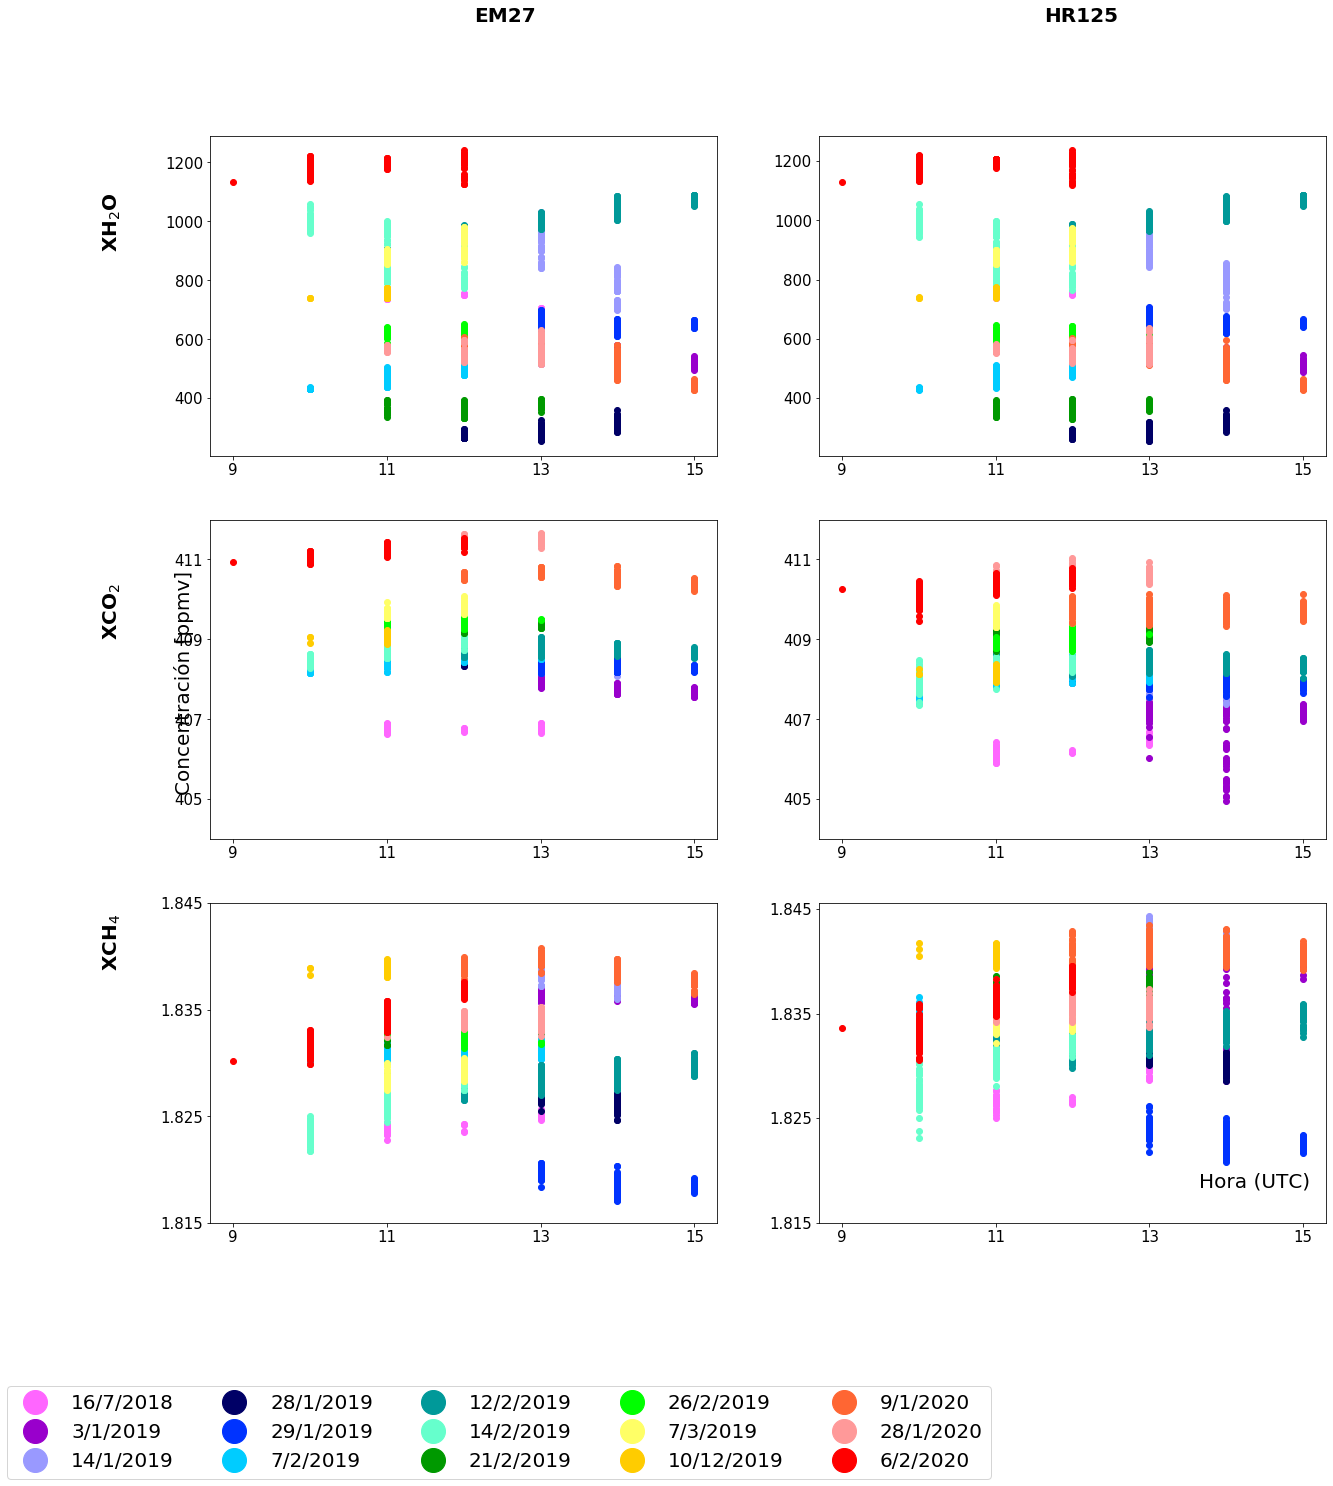

In [25]:
data(base[:,1:,1:])

# GUARDADO Y MAGNITUDES DE COMPARACIÓN

In [26]:
base_save=np.delete(base, 0, axis=1)
flat_base = np.zeros((base_save.shape[1]*2,16), dtype='O')
#flat_base[0,:]= first_line

for k in range(base_save.shape[1]):
    flat_base[k*2] = base_save[0,k,:]
    flat_base[k*2+1] = base_save[1,k,:]

flat_base = np.insert(flat_base, 0, first_line, axis=0)
np.savetxt('base_comun.txt', flat_base[:,0:7], fmt='%s',delimiter=' ', newline='\n', encoding=None)
flat_base_ =flat_base
flat_base_[1:,1:]=flat_base_[1:,1:].astype('i8')
np.savetxt('base_comun_simple.txt', flat_base_[:,0:7], fmt='%s',delimiter=' ', newline='\n', encoding=None)

In [27]:
base_save2= np.delete(base,0,axis=1)
base_save2 = np.delete(base_save2, 0,axis=2)

flat_base2 = np.zeros((base_save2.shape[1], base_save2.shape[2]*2))
print(flat_base2.shape)
flat_base2[:,::2] = base_save2[0,:,:]
flat_base2[:,1::2] = base_save2[1,:,:]

np.savetxt('base_comun_c.txt', flat_base2, fmt='%s',delimiter=' ', newline='\n', encoding=None)

(2290, 30)


In [28]:
scale_factor = base[0,1:,-4:] / base[1,1:,-4:]
abs_diff = base[0,1:,-4:] - base[1,1:,-4:]
diff_perc = 100*(base[0,1:,-4:] - base[1,1:,-4:]) / base[1,1:,-4:]

gas = np.array(['XH2O(ppmv)',' XCO2(ppmv)',' XCH4(ppmv)',' Xair'])
version= base[0,]
scale_factor = np.insert(scale_factor,0,gas, axis=0)
diff_perc = np.insert(diff_perc,0,gas, axis=0)
abs_diff = np.insert(abs_diff,0,gas, axis=0)

np.savetxt('scale_factor.txt', scale_factor, fmt='%s',delimiter=' ', newline='\n', encoding=None)
np.savetxt('abs_diff.txt', abs_diff, fmt='%s',delimiter=' ', newline='\n', encoding=None)
np.savetxt('abs_diff_perc.txt', diff_perc, fmt='%s',delimiter=' ', newline='\n', encoding=None)

# FILTROS

In [29]:
def tukey(data,k):
    len_before = data.shape[0]
    len_after = np.empty((0))
    
    for x in range(3):
        batch = data[:,x]
        Q1, Q3 = np.quantile(batch, [0.25, 0.75])

        inf_limit = Q1 - k*(Q3-Q1)
        sup_limit = Q3 + k*(Q3-Q1)

        
        ind_d = np.concatenate((np.where(batch < inf_limit)[0],\
                                    np.where(batch > sup_limit)[0]))
        

        if x==0: 
            ind_H2O = ind_d
            H2O = np.delete(batch, ind_H2O)
            len_after = np.append(len_after, len(H2O))
            """
            print('')
            print('FTIR H2O')
            print(Q1, Q3)
            print('Filtro inferior: {} ------ Filtro superior: {}'.format(inf_limit, sup_limit))
            print('Mínimo de la serie: {} ------- Máximo de la serie: {}'.format(min(batch), max(batch)))
            """
        
        if x==1: 
            ind_CO2 = ind_d
            CO2 = np.delete(batch, ind_CO2)
            len_after = np.append(len_after, len(CO2))
            """
            print('')
            print('FTIR CO2')
            print(Q1, Q3)
            print('Filtro inferior: {} ------ Filtro superior: {}'.format(inf_limit, sup_limit))
            print('Mínimo de la serie: {} ------- Máximo de la serie: {}'.format(min(batch), max(batch)))
            """
            
        if x==2: 
            ind_CH4 = ind_d
            CH4 = np.delete(batch, ind_CH4)
            len_after = np.append(len_after, len(CH4))
            """
            print('')
            print('FTIR CH4')
            print(Q1, Q3)
            print('Filtro inferior: {} ------ Filtro superior: {}'.format(inf_limit, sup_limit))
            print('Mínimo de la serie: {} ------- Máximo de la serie: {}'.format(min(batch), max(batch)))
            """

    print(len_before-len_after)
    perc = 100*(1-(len_after/len_before))
    return ind_H2O, ind_CO2, ind_CH4, perc

In [30]:
ind_H2O_FTIR_15, ind_CO2_FTIR_15, ind_CH4_FTIR_15, perc_FTIR_15 = tukey(base[1,1:,12:],1.5)

[ 0. 12. 87.]


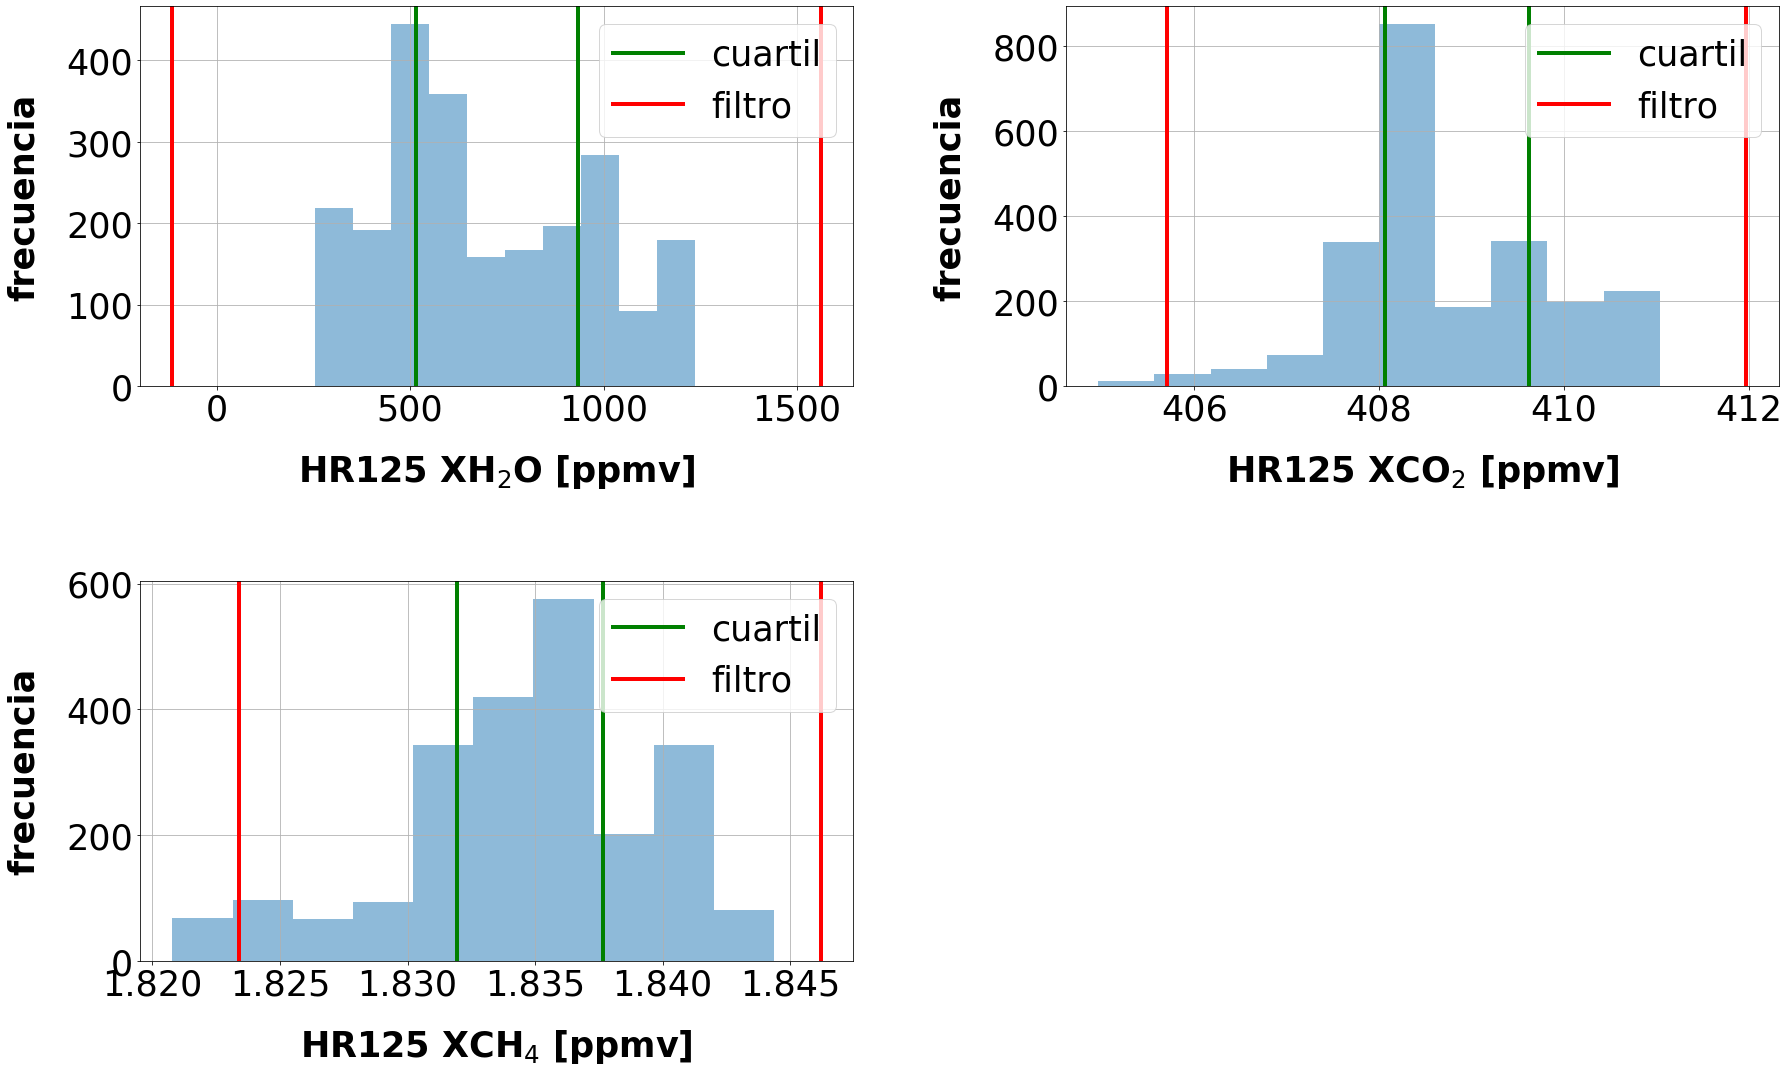

In [31]:
plt.figure(figsize=(25,15))

plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':35})

plt.subplot(221)
_=plt.hist(base[1,1:,1:][:,11], alpha=0.5)
plt.axvline(x=514.07025,color='green', label='cuartil', linewidth=4)
plt.axvline(x=932.9370000000001, color='green', linewidth=4)
plt.axvline(x=-114.22987500000022,color='red', label='filtro', linewidth=4)
plt.axvline(x=1561.2371250000003, color='red', linewidth=4)
plt.xlabel('HR125 XH$_2$O [ppmv]')
plt.ylabel('frecuencia')
plt.xticks()
plt.yticks()
plt.legend(loc='upper right')
plt.grid()

plt.subplot(222)
_=plt.hist(base[1,1:,1:][:,12], alpha=0.5)
plt.axvline(x=408.05925,color='green', label='cuartil', linewidth=4)
plt.axvline(x=409.6255, color='green', linewidth=4)
plt.axvline(x=405.70987500000007 ,color='red', label='filtro', linewidth=4)
plt.axvline(x=411.97487499999994, color='red', linewidth=4)
plt.xlabel('HR125 XCO$_2$ [ppmv]')
plt.ylabel('frecuencia')
plt.xticks()
plt.yticks()
plt.legend(loc='upper right')
plt.grid()


plt.subplot(223)
_=plt.hist(base[1,1:,1:][:,13], alpha=0.5)
plt.axvline(x=1.8319425,color='green', label='cuartil', linewidth=4)
plt.axvline(x=1.83764,color='green', linewidth=4)
plt.axvline(x=1.82339625 ,color='red', label='filtro', linewidth=4)
plt.axvline(x= 1.8461862499999997, color='red', linewidth=4)
plt.xlabel('HR125 XCH$_4$ [ppmv]')
plt.ylabel('frecuencia')
plt.xticks()
plt.yticks()
plt.legend(loc='upper right')
plt.grid()


plt.tight_layout(w_pad=8, h_pad=8)
#plt.suptitle(r'Distribución de concentraciones', fontsize=25)
plt.savefig('hist_FTIR.jpg')

In [32]:
ind_H2O_EM27_15, ind_CO2_EM27_15, ind_CH4_EM27_15, perc_EM27_15 = tukey(base[0,1:,12:],1.5)
ind_H2O_EM27_3, ind_CO2_EM27_3, ind_CH4_EM27_3, perc_EM27_3 = tukey(base[0,1:,12:],3)
ind_H2O_FTIR_15, ind_CO2_FTIR_15, ind_CH4_FTIR_15, perc_FTIR_15 = tukey(base[1,1:,12:],1.5)
ind_H2O_FTIR_3, ind_CO2_FTIR_3, ind_CH4_FTIR_3, perc_FTIR_3 = tukey(base[1,1:,12:],3)

[0. 0. 9.]
[0. 0. 0.]
[ 0. 12. 87.]
[0. 0. 0.]


In [33]:
perc_EM27_15, perc_EM27_3, perc_FTIR_15, perc_FTIR_3

(array([0.       , 0.       , 0.3930131]),
 array([0., 0., 0.]),
 array([0.        , 0.52401747, 3.79912664]),
 array([0., 0., 0.]))

In [34]:
print(ind_CO2_FTIR_15)

[ 92  93  94  95  96  97  99 100 101 102 105 108]


In [35]:
print(len(ind_H2O_EM27_15), len(ind_CO2_EM27_15), len(ind_CH4_EM27_15))
print(len(ind_H2O_FTIR_15), len(ind_CO2_FTIR_15), len(ind_CH4_FTIR_15))

0 0 9
0 12 87


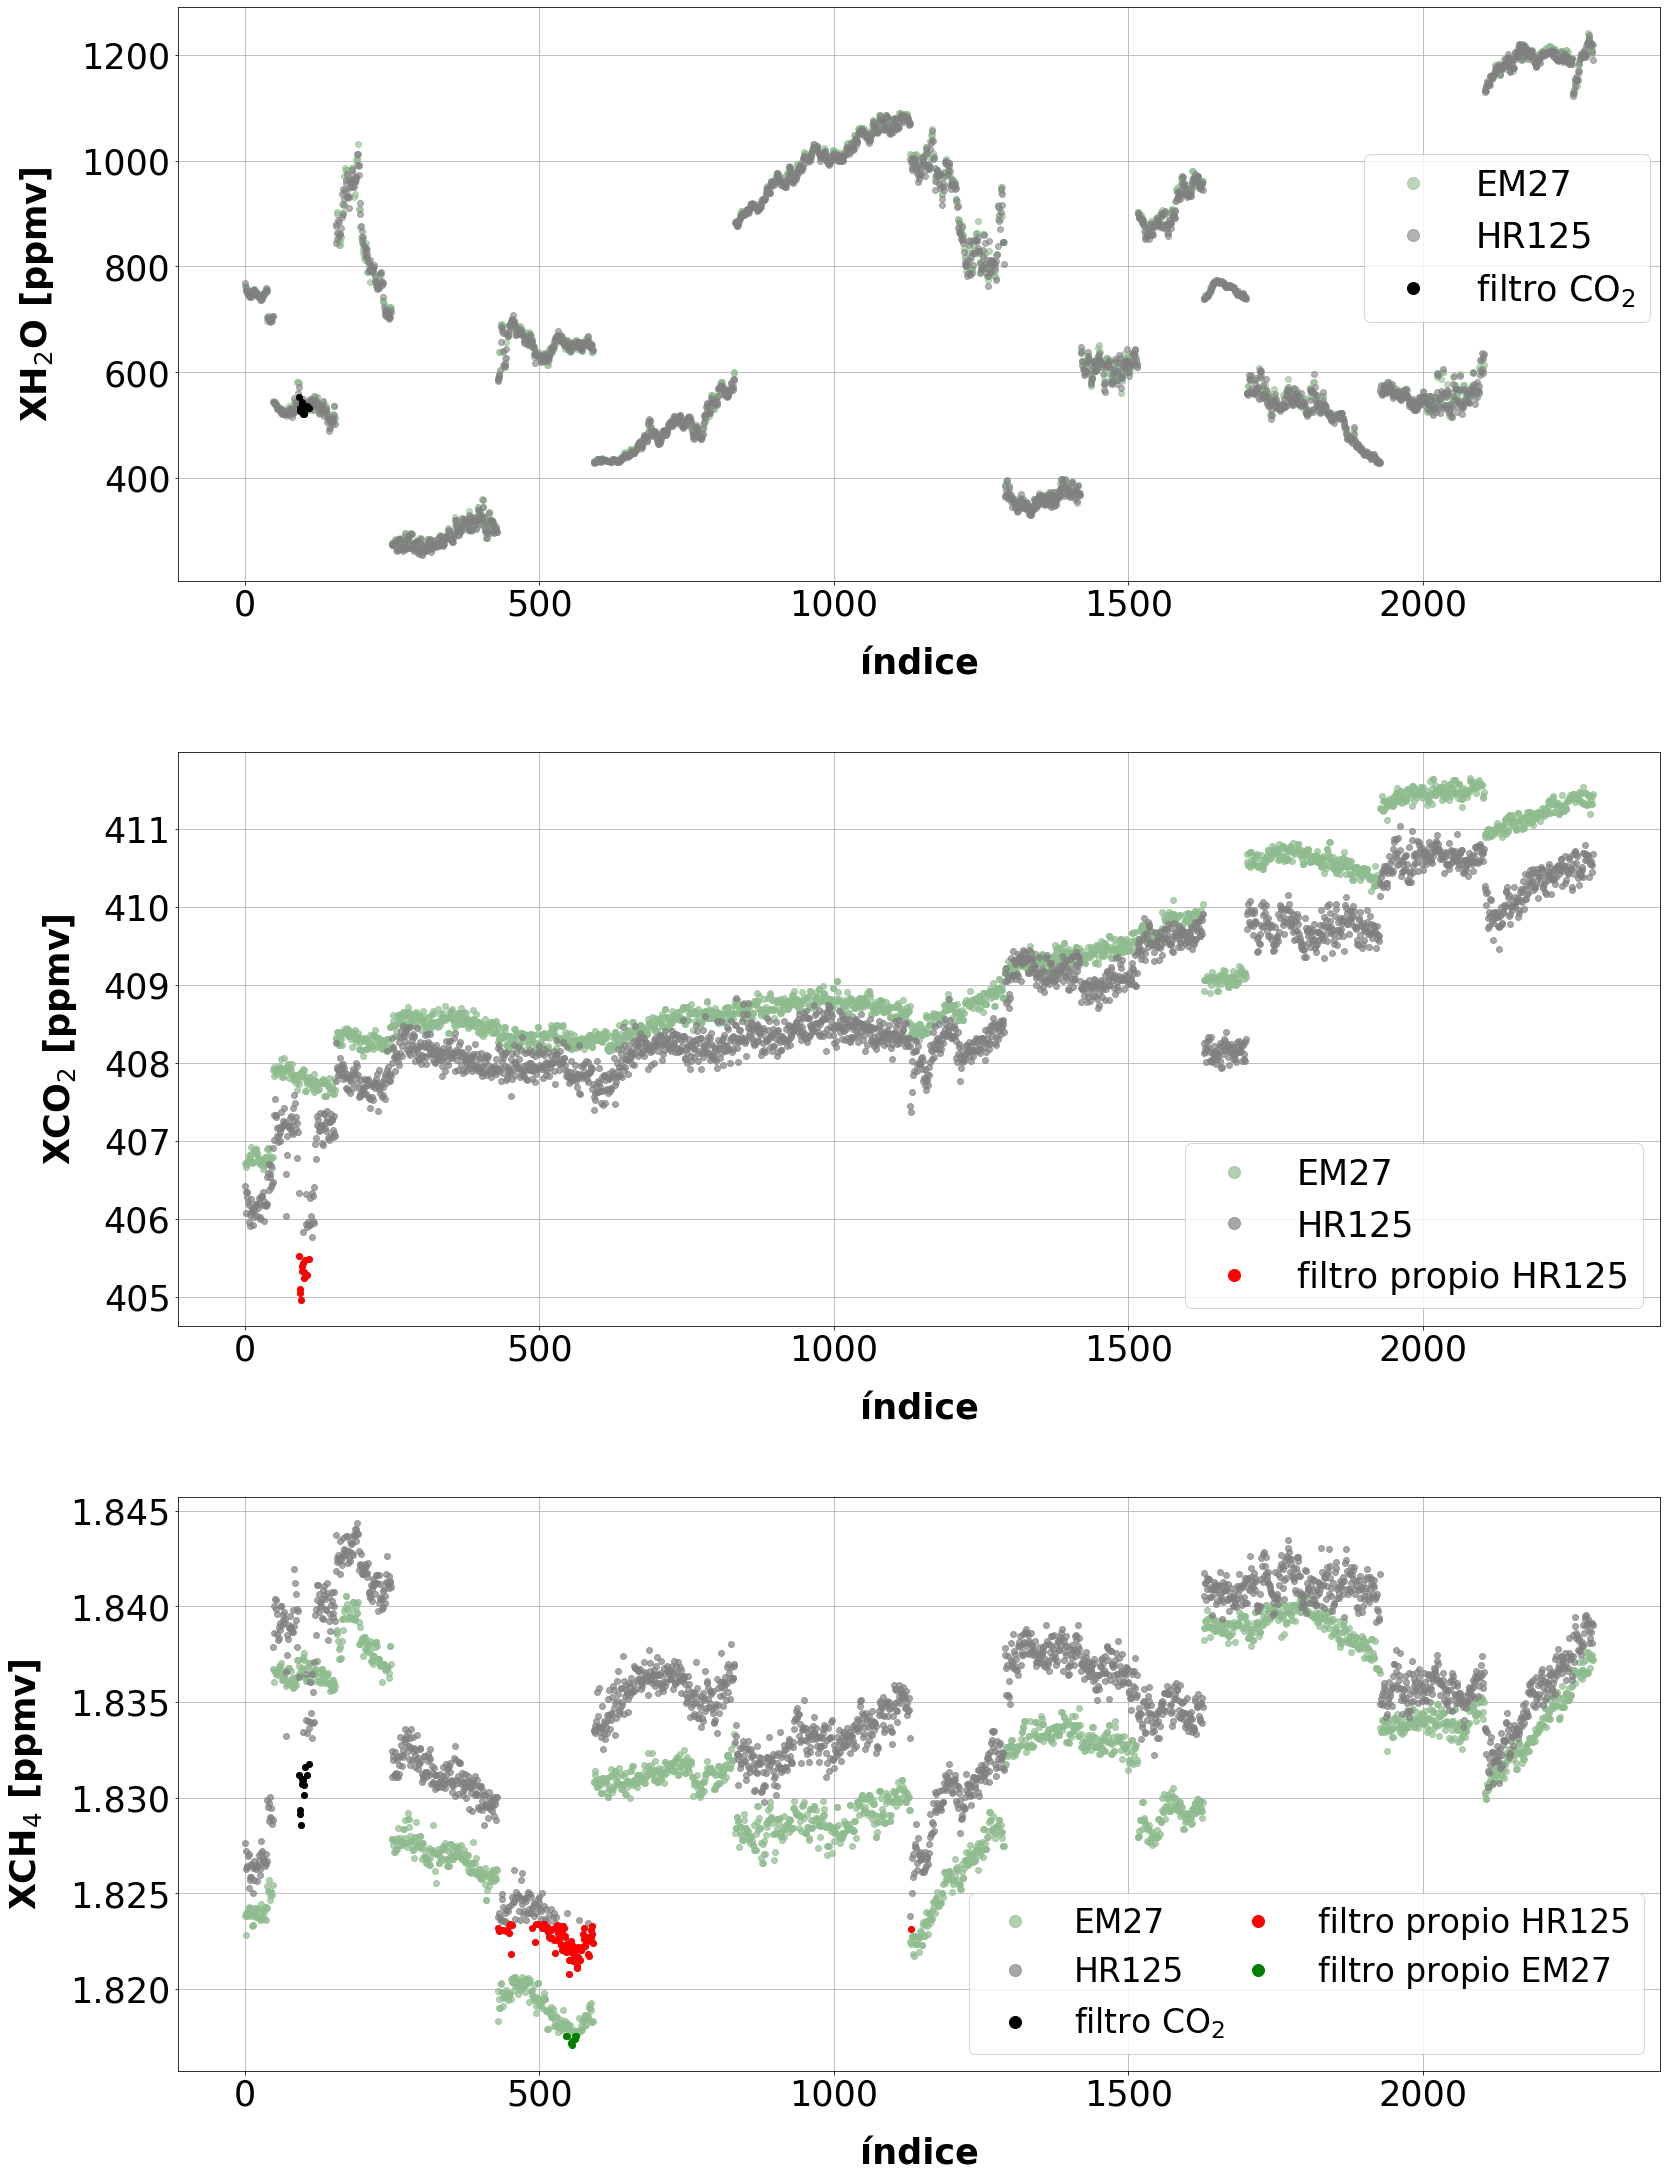

In [36]:
fig = plt.figure(figsize=(25,32))

plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':35})

plt.subplot(311)
plt.grid()
plt.plot(np.arange(len(base[0,1:,12])), base[0,1:,12], color='darkseagreen', marker='o',linestyle='None', alpha=0.6, label='EM27')
plt.plot(np.arange(len(base[1,1:,12])), base[1,1:,12], color='grey', marker='o',linestyle='None', alpha=0.6, label='HR125')

plt.plot(np.arange(len(base[1,1:,12]))[ind_CO2_FTIR_15], base[1,1:,12][ind_CO2_FTIR_15], 'ko', label='filtro CO$_2$')

plt.legend(loc=(0.8,0.45),markerscale=2)
plt.xlabel(r'índice')
plt.xticks()
plt.ylabel('XH$_2$O [ppmv]')
plt.yticks()
#plt.axvline(x=80,color='darkblue')
#plt.axvline(x=130, color='darkblue')

plt.subplot(312)
plt.grid()
plt.plot(np.arange(len(base[0,1:,13])), base[0,1:,13], color='darkseagreen', marker='o',linestyle='None', alpha=0.7, label='EM27')
plt.plot(np.arange(len(base[1,1:,13])), base[1,1:,13], color='grey', marker='o',linestyle='None', alpha=0.7, label='HR125')

plt.plot(np.arange(len(base[1,1:,13]))[ind_CO2_FTIR_15], base[1,1:,13][ind_CO2_FTIR_15], 'ro', label='filtro propio HR125')

plt.legend(loc='lower right',markerscale=2)
plt.xlabel(r'índice')
plt.xticks()
plt.ylabel('XCO$_2$ [ppmv]')
plt.yticks()
#plt.axvline(x=80,color='darkblue')
#plt.axvline(x=130, color='darkblue')

plt.subplot(313)
plt.grid()
plt.plot(np.arange(len(base[0,1:,14])), base[0,1:,14], color='darkseagreen', marker='o',linestyle='None', alpha=0.7, label='EM27')
plt.plot(np.arange(len(base[1,1:,14])), base[1,1:,14], color='grey', marker='o',linestyle='None', alpha=0.7, label='HR125')

plt.plot(np.arange(len(base[1,1:,14]))[ind_CO2_FTIR_15], base[1,1:,14][ind_CO2_FTIR_15], 'ko', label='filtro CO$_2$')
plt.plot(np.arange(len(base[1,1:,14]))[ind_CH4_FTIR_15], base[1,1:,14][ind_CH4_FTIR_15], 'ro', label='filtro propio HR125')
plt.plot(np.arange(len(base[0,1:,14]))[ind_CH4_EM27_15], base[0,1:,14][ind_CH4_EM27_15], 'go', label='filtro propio EM27')


#plt.plot(np.arange(len(base[0,1:,14]))[ind_CH4_EM27_15], base[0,1:,14][ind_CH4_EM27_15], color='darkgreen', marker='o',linestyle='None', label='EM27 outliers')
#plt.plot(np.arange(len(base[1,1:,14]))[ind_CH4_FTIR_15], base[1,1:,14][ind_CH4_FTIR_15], 'ko', label='FTIR outliers')


plt.legend(loc='lower right',fontsize=33,columnspacing=0.,markerscale=2,ncol=2)
plt.xlabel(r'índice')
plt.xticks()
plt.ylabel('XCH$_4$ [ppmv]')
plt.yticks()
#plt.axvline(x=80,color='darkblue')
#plt.axvline(x=130, color='darkblue')

#plt.suptitle(r'', fontsize=25)
plt.tight_layout(pad=7)
plt.savefig('medidas.png')

# FILTRO SOBRE MAGNITUDES DE COMPARACIÓN

In [37]:
ind_H2O_sf_15, ind_CO2_sf_15, ind_CH4_sf_15, perc_sf_15 = tukey(scale_factor[1:,:],1.5)
ind_H2O_sf_3, ind_CO2_sf_3, ind_CH4_sf_3, perc_sf_3 = tukey(scale_factor[1:,:],3)

ind_H2O_diff_15, ind_CO2_diff_15, ind_CH4_diff_15, perc_diff_15 = tukey(abs_diff[1:,:],1.5)
ind_H2O_diff_3, ind_CO2_diff_3, ind_CH4_diff_3, perc_diff_3 = tukey(abs_diff[1:,:],3)

ind_H2O_diff_perc_15, ind_CO2_diff_perc_15, ind_CH4_diff_perc_15, perc_diff_perc_15 = tukey(diff_perc[1:,:],1.5)
ind_H2O_diff_perc_3, ind_CO2_diff_perc_3, ind_CH4_diff_perc_3, perc_diff_perc_3 = tukey(diff_perc[1:,:],3)


[250.  28.  25.]
[70. 13. 12.]
[174.  28.  25.]
[38. 12. 12.]
[250.  28.  25.]
[70. 13. 12.]


In [38]:
print(perc_sf_15, perc_sf_3)
print(perc_diff_15, perc_diff_3)
print(perc_diff_perc_15, perc_diff_perc_3)

[10.91703057  1.22270742  1.09170306] [3.05676856 0.56768559 0.52401747]
[7.59825328 1.22270742 1.09170306] [1.65938865 0.52401747 0.52401747]
[10.91703057  1.22270742  1.09170306] [3.05676856 0.56768559 0.52401747]


# PLOTS FILTRO CO2 VS FILTRO MAGNITUDES

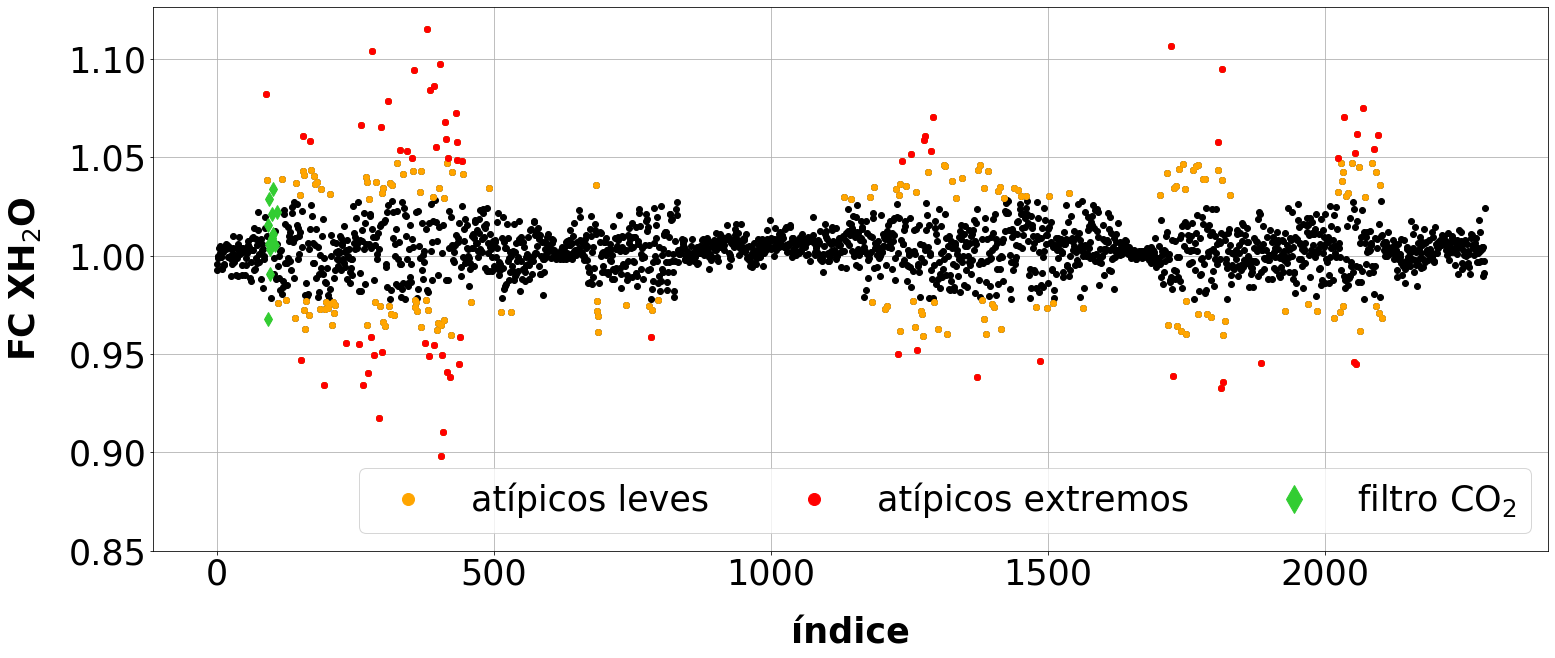

In [39]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':35})

#plt.subplot(311)
plt.grid()
plt.plot(np.arange(len(scale_factor[1:,0])), scale_factor[1:,0], 'ko')

plt.plot(np.arange(len(scale_factor[1:,0]))[ind_H2O_sf_15], scale_factor[1:,0][ind_H2O_sf_15], \
         color='orange', marker='o', linestyle='None', label='atípicos leves')

plt.plot(np.arange(len(scale_factor[1:,0]))[ind_H2O_sf_3], scale_factor[1:,0][ind_H2O_sf_3], 'ro', \
        label='atípicos extremos')

plt.plot(np.arange(len(scale_factor[1:,0]))[ind_CO2_FTIR_15], scale_factor[1:,0][ind_CO2_FTIR_15],  \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='filtro CO$_2$')

plt.xlabel('índice')
plt.xticks()
plt.ylabel('FC XH$_2$O')
plt.yticks()
plt.ylim(bottom=0.85)
plt.legend(loc='lower right',markerscale=2, ncol=3)

"""
plt.subplot(312)
plt.grid()
plt.plot(np.arange(len(abs_diff[1:,0])), abs_diff[1:,0], 'ko')

plt.plot(np.arange(len(abs_diff[1:,0]))[ind_H2O_diff_15], abs_diff[1:,0][ind_H2O_diff_15], \
         color='orange', marker='o', linestyle='None', label='átipicos leves')

plt.plot(np.arange(len(abs_diff[1:,0]))[ind_H2O_diff_3], abs_diff[1:,0][ind_H2O_diff_3], 'ro', \
         label='atípicos extremos')

plt.plot(np.arange(len(abs_diff[1:,0]))[ind_CO2_FTIR_15], abs_diff[1:,0][ind_CO2_FTIR_15], \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='índices CO$_2$')

plt.xlabel('índice', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('diferencia absoluta XH$_2$O', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25, loc='lower right')

plt.subplot(313)
plt.grid()
plt.plot(np.arange(len(diff_perc[1:,0])), diff_perc[1:,0], 'ko')

plt.plot(np.arange(len(diff_perc[1:,0]))[ind_H2O_diff_perc_15], diff_perc[1:,0][ind_H2O_diff_perc_15], \
         color='orange', marker='o', linestyle='None', label='átipicos leves')

plt.plot(np.arange(len(diff_perc[1:,0]))[ind_H2O_diff_perc_3], diff_perc[1:,0][ind_H2O_diff_perc_3], 'ro', \
         label='atípicos extremos')

plt.plot(np.arange(len(diff_perc[1:,0]))[ind_CO2_FTIR_15], diff_perc[1:,0][ind_CO2_FTIR_15], \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='índices CO$_2$')
plt.xlabel('índice', fontsize=25, labelpad=20)

plt.xticks(fontsize=25)
plt.ylabel('diferencia porcentual XH$_2$O', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25, loc='lower right')

plt.tight_layout(pad=7)
"""

plt.savefig('mag_com_H2O.jpg')


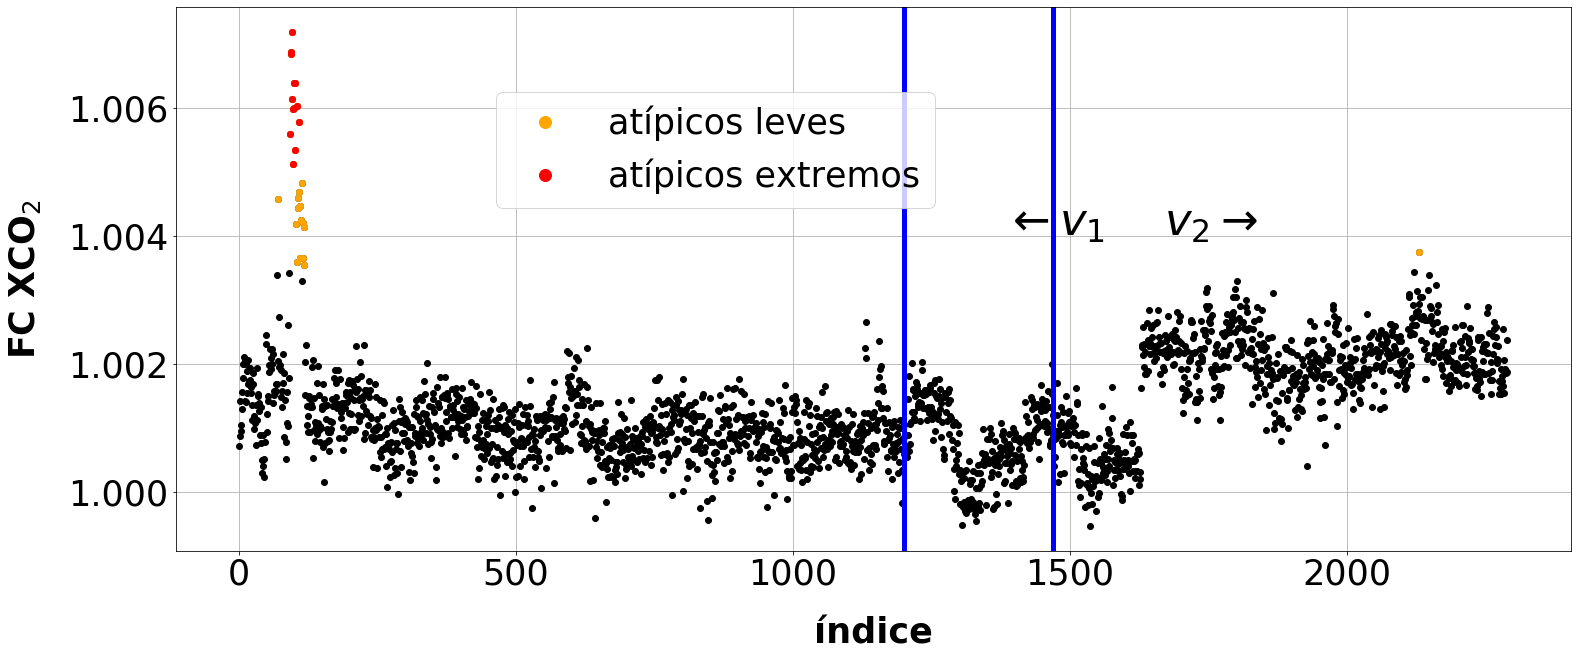

In [40]:
%matplotlib inline

fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':35})

#plt.subplot(311)
plt.grid()
plt.plot(np.arange(len(scale_factor[1:,1])), scale_factor[1:,1], 'ko')

plt.plot(np.arange(len(scale_factor[1:,1]))[ind_CO2_sf_15], scale_factor[1:,1][ind_CO2_sf_15], \
         color='orange', marker='o', linestyle='None', label='atípicos leves')

plt.plot(np.arange(len(scale_factor[1:,1]))[ind_CO2_sf_3], scale_factor[1:,1][ind_CO2_sf_3], 'ro', \
         label='atípicos extremos')

plt.axvline(x=1200, color='b', linewidth=5)
plt.axvline(x=1470, color='b', linewidth=5)

"""
plt.plot(np.arange(len(scale_factor[1:,1]))[ind_CO2_FTIR_15], scale_factor[1:,1][ind_CO2_FTIR_15],  \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='filtro CO$_2$')
"""
plt.xlabel('índice')
plt.xticks()
plt.ylabel('FC XCO$_2$')
plt.yticks()
#plt.axvline(x=1626, color='b', linewidth=5)
plt.text(1380, 1.004, r'$ \leftarrow v_1 $', fontsize=45)
plt.text(1670, 1.004, r'$ v_2 \rightarrow $', fontsize=45)
plt.legend(loc=(0.23,0.63), markerscale=2)


"""
plt.subplot(312)
plt.grid()
plt.plot(np.arange(len(abs_diff[1:,1])), abs_diff[1:,1], 'ko')

plt.plot(np.arange(len(abs_diff[1:,1]))[ind_CO2_diff_15], abs_diff[1:,1][ind_CO2_diff_15], \
         color='orange', marker='o', linestyle='None', label='átipicos leves')

plt.plot(np.arange(len(abs_diff[1:,1]))[ind_CO2_diff_3], abs_diff[1:,1][ind_CO2_diff_3], 'ro', \
         label='atípicos extremos')

plt.plot(np.arange(len(abs_diff[1:,1]))[ind_CO2_FTIR_15], abs_diff[1:,1][ind_CO2_FTIR_15], \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='índices CO$_2$')

plt.xlabel('índice', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('diferencia absoluta XCO$_2$', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25, loc='upper right')



plt.subplot(313)
plt.grid()
plt.plot(np.arange(len(diff_perc[1:,1])), diff_perc[1:,1], 'ko')

plt.plot(np.arange(len(diff_perc[1:,1]))[ind_CO2_diff_perc_15], diff_perc[1:,1][ind_CO2_diff_perc_15], \
         color='orange', marker='o', linestyle='None', label='átipicos leves')

plt.plot(np.arange(len(diff_perc[1:,1]))[ind_CO2_diff_perc_3], diff_perc[1:,1][ind_CO2_diff_perc_3], 'ro', \
         label='atípicos extremos')

plt.plot(np.arange(len(diff_perc[1:,1]))[ind_CO2_FTIR_15], diff_perc[1:,1][ind_CO2_FTIR_15], \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='índices CO$_2$')

plt.xlabel('índice', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('diferencia porcentual XCO$_2$', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25, loc='upper right')

plt.tight_layout(pad=7)
"""
plt.savefig('mag_com_CO2.jpg')

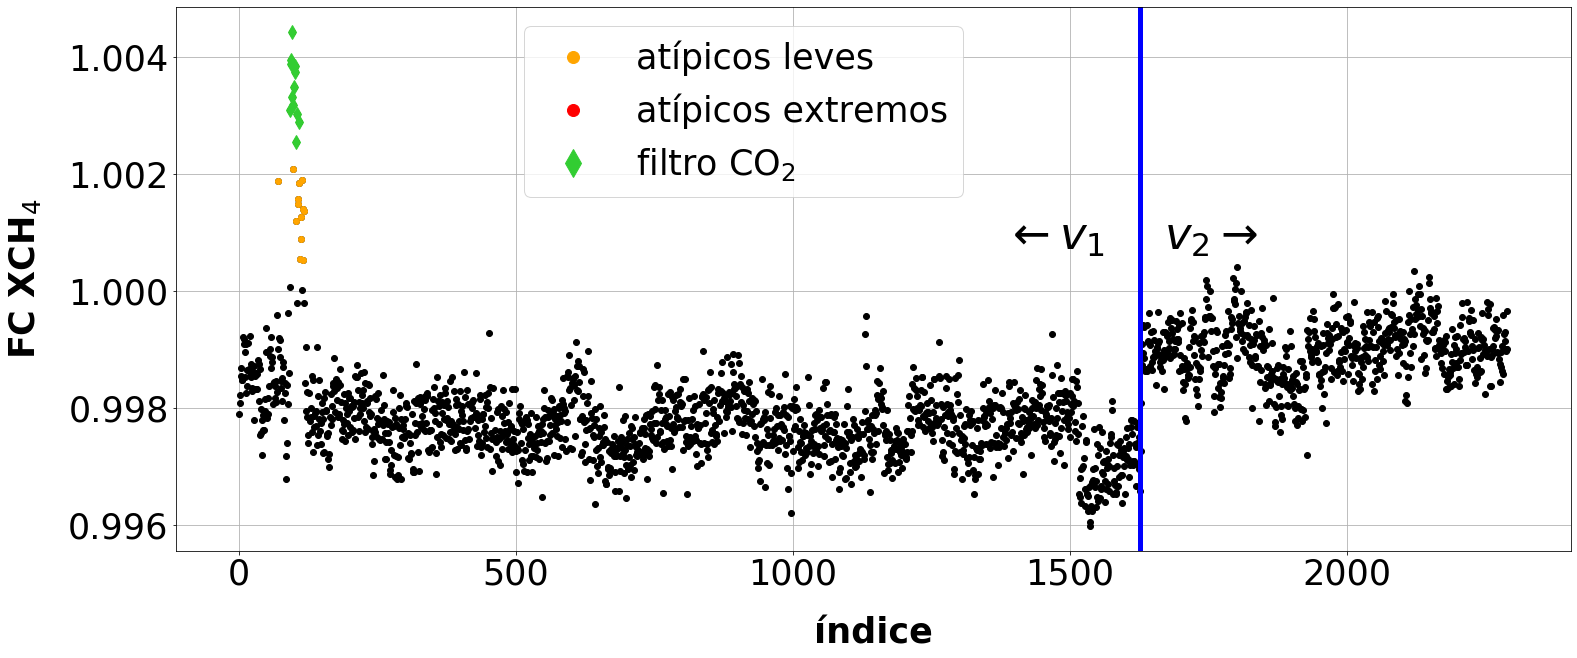

In [41]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':35})

#plt.subplot(311)
plt.grid()
plt.plot(np.arange(len(scale_factor[1:,2])), scale_factor[1:,2], 'ko')

plt.plot(np.arange(len(scale_factor[1:,2]))[ind_CH4_sf_15], scale_factor[1:,2][ind_CH4_sf_15], \
         color='orange', marker='o', linestyle='None', label='atípicos leves')

plt.plot(np.arange(len(scale_factor[1:,2]))[ind_CH4_sf_3], scale_factor[1:,2][ind_CH4_sf_3], 'ro', \
         label='atípicos extremos')

plt.plot(np.arange(len(scale_factor[1:,2]))[ind_CO2_FTIR_15], scale_factor[1:,2][ind_CO2_FTIR_15],  \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='filtro CO$_2$')

plt.xlabel('índice')
plt.xticks()
plt.ylabel('FC XCH$_4$')
plt.yticks()
plt.legend(loc='upper right', markerscale=2)
plt.axvline(x=1626, color='b', linewidth=5)
plt.text(1380, 1.0007, r'$ \leftarrow v_1 $', fontsize=45)
plt.text(1670, 1.0007, r'$ v_2 \rightarrow $', fontsize=45)
plt.legend(loc=(0.25,0.65), markerscale=2)


"""

plt.subplot(312)
plt.grid()
plt.plot(np.arange(len(abs_diff[1:,2])), abs_diff[1:,2], 'ko')

plt.plot(np.arange(len(abs_diff[1:,2]))[ind_CH4_diff_15], abs_diff[1:,2][ind_CH4_diff_15], \
         color='orange', marker='o', linestyle='None', label='átipicos leves')

plt.plot(np.arange(len(abs_diff[1:,2]))[ind_CH4_diff_3], abs_diff[1:,2][ind_CH4_diff_3], 'ro', \
         label='atípicos extremos')

plt.plot(np.arange(len(abs_diff[1:,2]))[ind_CO2_FTIR_15], abs_diff[1:,2][ind_CO2_FTIR_15], \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='índices CO$_2$')

plt.xlabel('índice', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('diferencia absoluta XCH$_4$', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25, loc='upper right')



plt.subplot(313)
plt.grid()
plt.plot(np.arange(len(diff_perc[1:,2])), diff_perc[1:,2], 'ko')

plt.plot(np.arange(len(diff_perc[1:,2]))[ind_CH4_diff_perc_15], diff_perc[1:,2][ind_CH4_diff_perc_15], \
         color='orange', marker='o', linestyle='None', label='átipicos leves')

plt.plot(np.arange(len(diff_perc[1:,2]))[ind_CH4_diff_perc_3], diff_perc[1:,2][ind_CH4_diff_perc_3], 'ro', \
         label='atípicos extremos')

plt.plot(np.arange(len(diff_perc[1:,2]))[ind_CO2_FTIR_15], diff_perc[1:,2][ind_CO2_FTIR_15], \
          color='limegreen', linestyle='None', marker='d',markersize=10,label='índices CO$_2$')

plt.xlabel('índice', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('diferencia porcentual XCH$_4$', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25, loc='upper right')


plt.tight_layout(pad=7)
"""
plt.savefig('mag_com_CH4.jpg')

# SZA

In [42]:
def x_SZA(base_):
    
    
    i_break = np.array([0])
    SZA = np.zeros((base_.shape[0]))
    base_= np.insert(base_, base_.shape[0], np.zeros((base_.shape[1])), axis=0)
    
    for i in range(base_.shape[0]-1):
        if base_[i,2]==base_[i+1,2]:
            continue
        
        else:
            min_sza = np.where(base_[i_break[-1]:i+1, 10] == \
                               min(base_[i_break[-1]:i+1, 10]))[0][0]

            SZA[i_break[-1]:i_break[-1]+min_sza+1] = -1*base_[i_break[-1]:i_break[-1]+min_sza+1, 10]
            SZA[i_break[-1]+min_sza+1:i+1] = base_[i_break[-1]+min_sza+1:i+1, 10]
            i_break = np.append(i_break, i+1)
            continue


    return SZA, i_break, base_

In [43]:
SZA, i_break, base_ = x_SZA(base_ = base[0,1:,1:]) 
np.savetxt('SZA_c3.txt', SZA, fmt='%s',delimiter=' ', newline='\n', encoding=None)

# FACTOR DE ESCALA CORREGIDO

In [44]:
scale_factor_c = scale_factor[1:,:]

scale_factor_c[ind_H2O_sf_15,0] = np.nan

scale_factor_c[ind_CO2_sf_15,1] = np.nan

scale_factor_c[ind_CH4_sf_15,2] = np.nan


In [45]:
print(scale_factor_c.shape)
print()

(2290, 4)



## SZA PLOTS

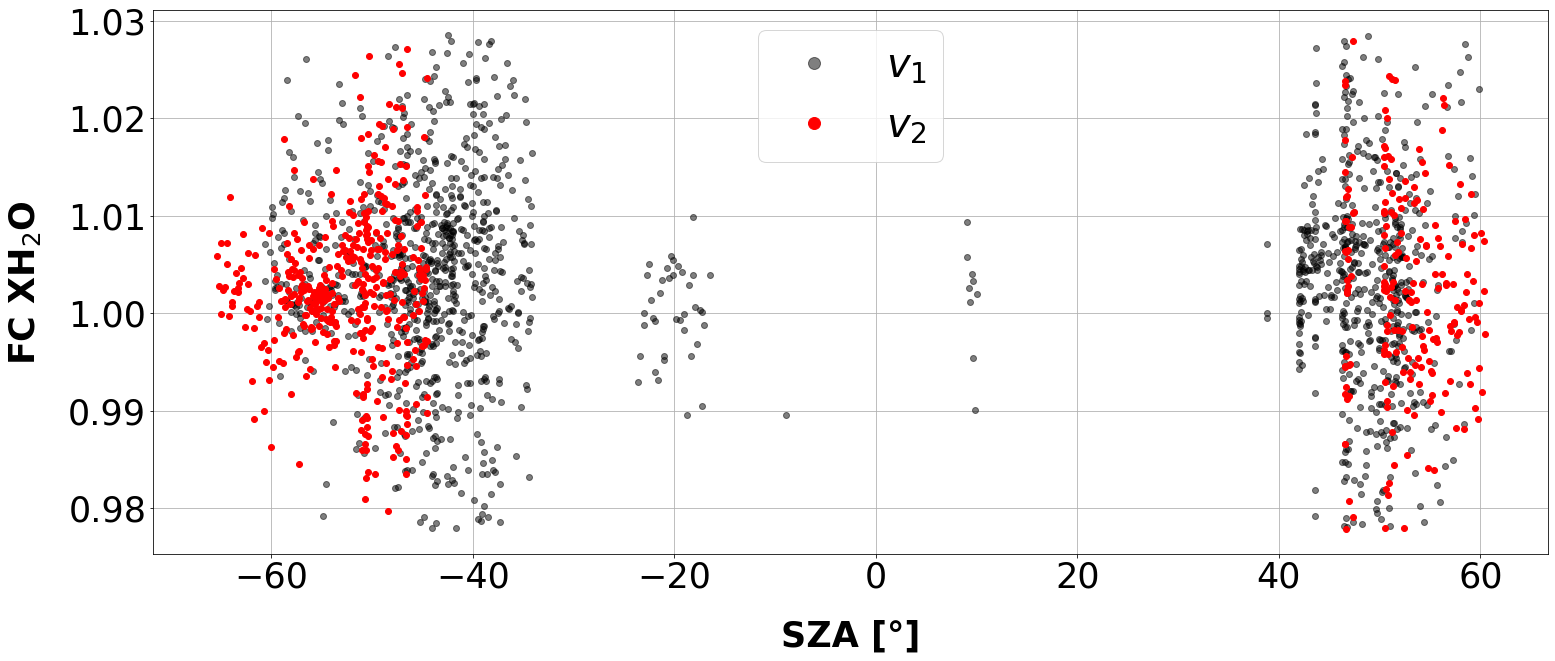

In [46]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':40})

#plt.subplot(311)
plt.grid()
plt.plot(SZA[0:1628], scale_factor_c[0:1628,0], 'ko', label='$v_1$', alpha=0.5)
plt.plot(SZA[1628:], scale_factor_c[1628:,0], 'ro', label='$v_2$')
plt.xlabel('SZA [°]')
plt.xticks()
plt.ylabel('FC XH$_2$O')
plt.yticks()
plt.legend(loc='upper center', markerscale=2)

"""
plt.subplot(312)
plt.grid()
plt.plot(SZA, abs_diff[1:,0], 'ko')
plt.title('Diferencia aboluta H2O vs SZA', fontsize=30)
plt.xlabel('SZA [º]', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('Diferencia absoluta H2O', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)

plt.subplot(313)
plt.grid()
plt.plot(SZA, abs_diff_perc[1:,0], 'ko')
plt.title('Diferencia porcentual H2O vs SZA', fontsize=30)
plt.xlabel('SZA [º]', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('Diferencia porcentual H2O', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)

plt.tight_layout(pad=7)
"""
plt.savefig('H2O_sza.jpg')


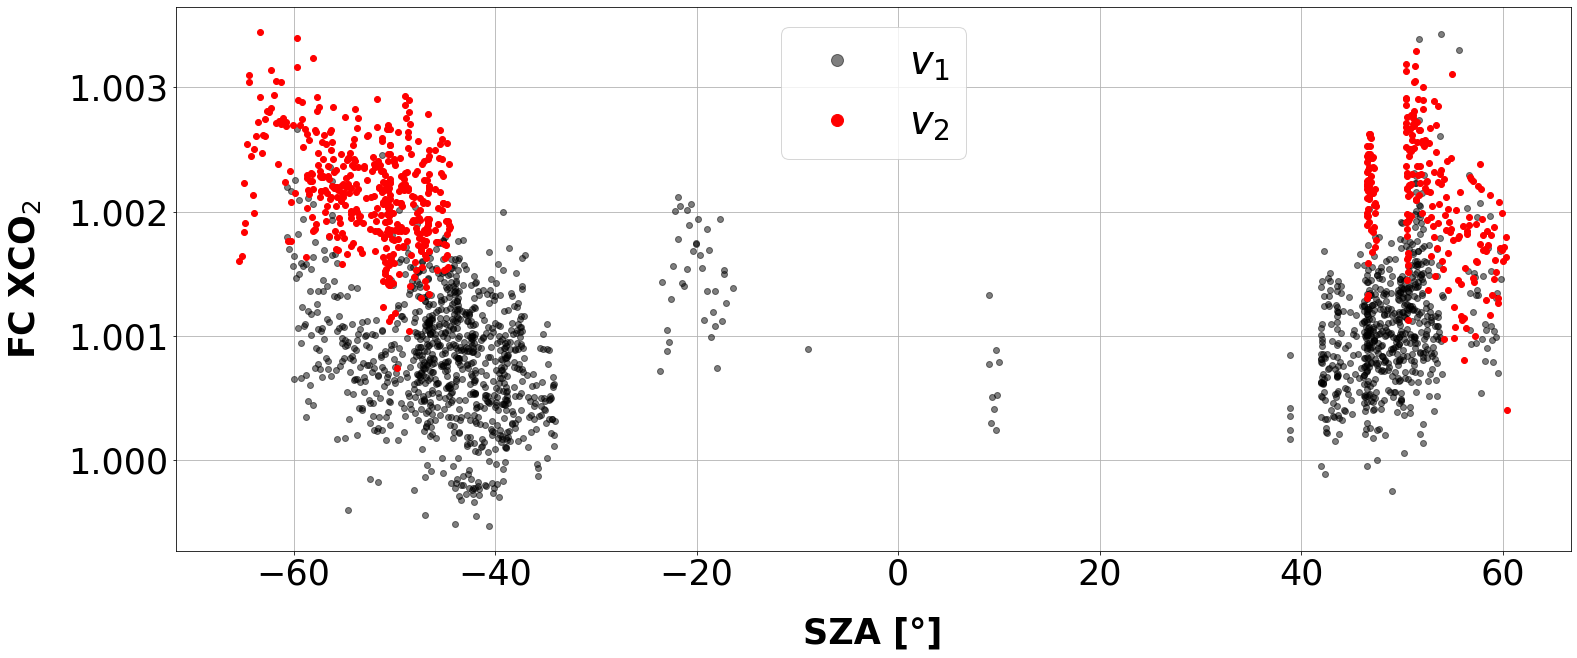

In [47]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':40})

#plt.subplot(311)
plt.grid()
plt.plot(SZA[0:1628], scale_factor_c[0:1628,1], 'ko', label='$v_1$', alpha=0.5)
plt.plot(SZA[1628:], scale_factor_c[1628:,1], 'ro', label='$v_2$')
plt.legend(loc='upper center', markerscale=2)
plt.xlabel('SZA [°]')
plt.xticks()
plt.ylabel('FC XCO$_2$')
plt.yticks()


"""
plt.subplot(312)
plt.grid()
plt.plot(SZA, abs_diff[1:,1], 'ko')
plt.plot(SZA[ind_CO2_FTIR_15], abs_diff[1:,1][ind_CO2_FTIR_15], 'ro')
plt.title('Diferencia aboluta CO2 vs SZA', fontsize=30)
plt.xlabel('SZA [º]', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('Diferencia absoluta CO2', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)

plt.subplot(313)
plt.grid()
plt.plot(SZA, abs_diff_perc[1:,1], 'ko')
plt.plot(SZA[ind_CO2_FTIR_15], abs_diff_perc[1:,1][ind_CO2_FTIR_15], 'ro')
plt.title('Diferencia porcentual CO2 vs SZA', fontsize=30)
plt.xlabel('SZA [º]', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('Diferencia porcentual CO2', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)

plt.tight_layout(pad=7)
"""
plt.savefig('CO2_sza.jpg')

In [48]:
print(np.nanmean(scale_factor_c[0:1628,1][(SZA[0:1628]>=50) & (SZA[0:1628]<=60)].astype('float')))
#plt.plot(SZA[1628:], scale_factor_c[1628:,1], 'ro', label='$v_2$'))
print(np.nanstd(scale_factor_c[0:1628,1][(SZA[0:1628]>=50) & (SZA[0:1628]<=60)].astype('float')))

print('')


print(np.nanmean(scale_factor_c[1628:,1][(SZA[1628:]>=50) & (SZA[1628:]<=60)].astype('float')))
print(np.nanstd(scale_factor_c[1628:,1][(SZA[1628:]>=50) & (SZA[1628:]<=60)].astype('float')))


1.0012821767475437
0.0005114979976370587

1.0020903039717763
0.0005288006289000419


In [49]:
print(np.nanmean(scale_factor_c[0:1628,1][(SZA[0:1628]>=40) & (SZA[0:1628]<=50)].astype('float')))
#plt.plot(SZA[1628:], scale_factor_c[1628:,1], 'ro', label='$v_2$'))
print(np.nanstd(scale_factor_c[0:1628,1][(SZA[0:1628]>=40) & (SZA[0:1628]<=50)].astype('float')))

print('')


print(np.nanmean(scale_factor_c[1628:,1][(SZA[1628:]>=40) & (SZA[1628:]<=50)].astype('float')))
print(np.nanstd(scale_factor_c[1628:,1][(SZA[1628:]>=40) & (SZA[1628:]<=50)].astype('float')))

1.000935585958396
0.0003801462715872821

1.0021592712417375
0.00030064324874379587


In [42]:
print(np.nanmean(scale_factor_c[0:1628,2][(SZA[0:1628]>=50) & (SZA[0:1628]<=60)].astype('float')))
#plt.plot(SZA[1628:], scale_factor_c[1628:,1], 'ro', label='$v_2$'))
print(np.nanstd(scale_factor_c[0:1628,2][(SZA[0:1628]>=50) & (SZA[0:1628]<=60)].astype('float')))

print('')


print(np.nanmean(scale_factor_c[1628:,2][(SZA[1628:]>=50) & (SZA[1628:]<=60)].astype('float')))
print(np.nanstd(scale_factor_c[1628:,2][(SZA[1628:]>=50) & (SZA[1628:]<=60)].astype('float')))


0.997947749002819
0.0005710939338630127

0.9988475449445691
0.0006162901292726552


In [43]:
print(np.nanmean(scale_factor_c[0:1628,2][(SZA[0:1628]>=40) & (SZA[0:1628]<=50)].astype('float')))
#plt.plot(SZA[1628:], scale_factor_c[1628:,1], 'ro', label='$v_2$'))
print(np.nanstd(scale_factor_c[0:1628,2][(SZA[0:1628]>=40) & (SZA[0:1628]<=50)].astype('float')))

print('')


print(np.nanmean(scale_factor_c[1628:,2][(SZA[1628:]>=40) & (SZA[1628:]<=50)].astype('float')))
print(np.nanstd(scale_factor_c[1628:,2][(SZA[1628:]>=40) & (SZA[1628:]<=50)].astype('float')))

0.9976482269214132
0.0004188137244994529

0.999192067111496
0.0003148906702246107


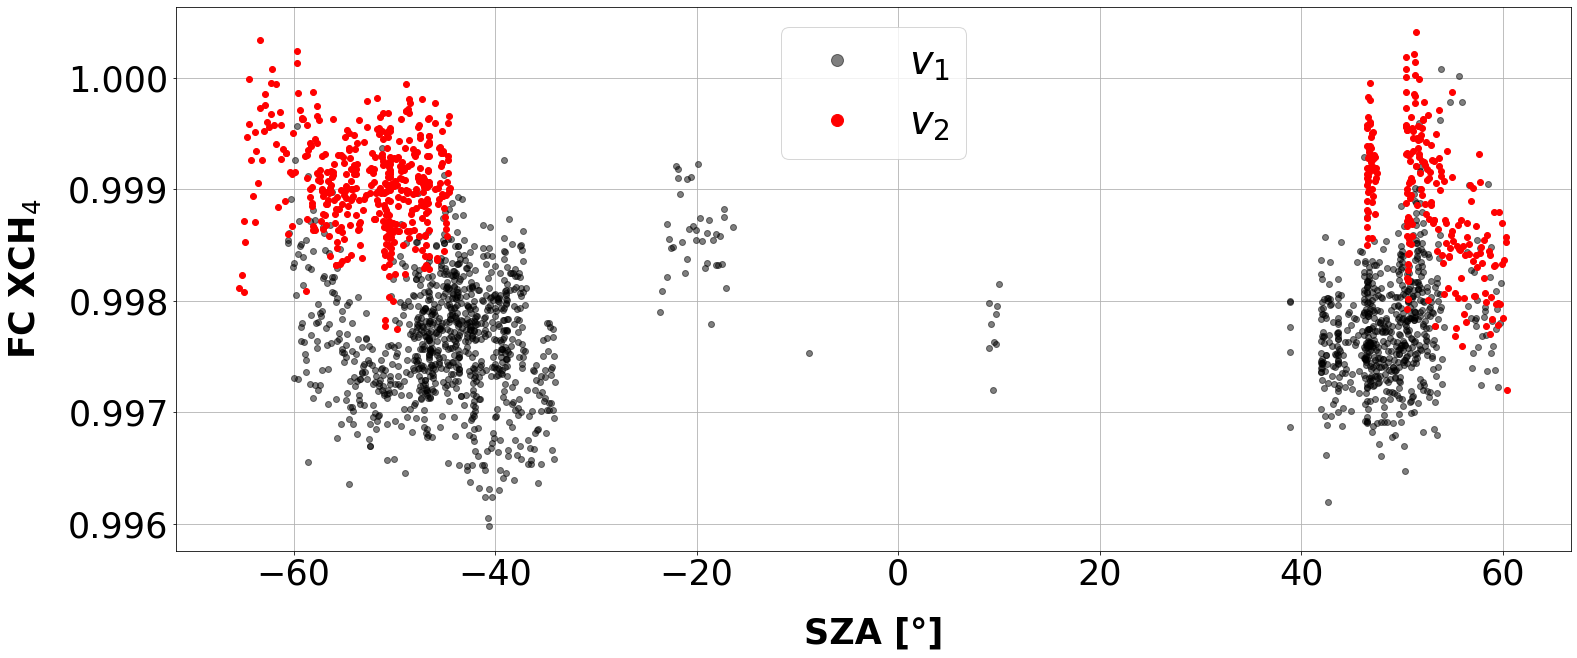

In [50]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':40})

#plt.subplot(311)
plt.grid()
plt.plot(SZA[0:1628], scale_factor_c[0:1628,2], 'ko', label='$v_1$', alpha=0.5)
plt.plot(SZA[1628:], scale_factor_c[1628:,2], 'ro', label='$v_2$')
plt.legend(loc='upper center', markerscale=2)
plt.xlabel('SZA [°]')
plt.xticks()
plt.ylabel('FC XCH$_4$')
plt.yticks()


"""
plt.subplot(312)
plt.grid()
plt.plot(SZA, abs_diff[1:,2], 'ko')
plt.plot(SZA[ind_CH4_EM27_15], abs_diff[1:,2][ind_CH4_EM27_15], 'ro')
plt.plot(SZA[ind_CH4_FTIR_15], abs_diff[1:,2][ind_CH4_FTIR_15], 'ro')
plt.title('Diferencia aboluta CH4 vs SZA', fontsize=30)
plt.xlabel('SZA [º]', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('Diferencia absoluta CH4', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)

plt.subplot(313)
plt.grid()
plt.plot(SZA, abs_diff_perc[1:,2], 'ko')
plt.plot(SZA[ind_CH4_EM27_15], abs_diff_perc[1:,2][ind_CH4_EM27_15], 'ro')
plt.plot(SZA[ind_CH4_FTIR_15], abs_diff_perc[1:,2][ind_CH4_FTIR_15], 'ro')
plt.title('Diferencia porcentual CH4 vs SZA', fontsize=30)
plt.xlabel('SZA [º]', fontsize=25, labelpad=20)
plt.xticks(fontsize=25)
plt.ylabel('Diferencia porcentual CH4', fontsize=25, labelpad=25)
plt.yticks(fontsize=25)

plt.tight_layout(pad=7)
"""
plt.savefig('CH4_sza.jpg')

# SCATTER PLOT

In [51]:
H2O_em27_c = base[0,1:,12].astype('float32')
CO2_em27_c = base[0,1:,13].astype('float32')
CH4_em27_c = base[0,1:,14].astype('float32')
H2O_hr125_c = base[1,1:,12].astype('float32')
CO2_hr125_c = base[1,1:,13].astype('float32')
CH4_hr125_c = base[1,1:,14].astype('float32')


H2O_em27_c[ind_H2O_sf_15], H2O_hr125_c[ind_H2O_sf_15] = np.nan, np.nan
CO2_em27_c[ind_CO2_sf_15], CO2_hr125_c[ind_CO2_sf_15] = np.nan, np.nan
CH4_em27_c[ind_CH4_sf_15], CH4_hr125_c[ind_CH4_sf_15] = np.nan, np.nan

H2O_em27_c_v1 = np.delete(H2O_em27_c[0:1628], np.where(np.isnan(H2O_em27_c[0:1628]))[0])
H2O_em27_c_v2 = np.delete(H2O_em27_c[1628:], np.where(np.isnan(H2O_em27_c[1628:]))[0])
H2O_hr125_c_v1 = np.delete(H2O_hr125_c[0:1628], np.where(np.isnan(H2O_hr125_c[0:1628]))[0])
H2O_hr125_c_v2 = np.delete(H2O_hr125_c[1628:], np.where(np.isnan(H2O_hr125_c[1628:]))[0])

CO2_em27_c_v1 = np.delete(CO2_em27_c[0:1628], np.where(np.isnan(CO2_em27_c[0:1628]))[0])
CO2_em27_c_v2 = np.delete(CO2_em27_c[1628:], np.where(np.isnan(CO2_em27_c[1628:]))[0])
CO2_hr125_c_v1 = np.delete(CO2_hr125_c[0:1628], np.where(np.isnan(CO2_hr125_c[0:1628]))[0])
CO2_hr125_c_v2 = np.delete(CO2_hr125_c[1628:], np.where(np.isnan(CO2_hr125_c[1628:]))[0])

CH4_em27_c_v1 = np.delete(CH4_em27_c[0:1628], np.where(np.isnan(CH4_em27_c[0:1628]))[0])
CH4_em27_c_v2 = np.delete(CH4_em27_c[1628:], np.where(np.isnan(CH4_em27_c[1628:]))[0])
CH4_hr125_c_v1 = np.delete(CH4_hr125_c[0:1628], np.where(np.isnan(CH4_hr125_c[0:1628]))[0])
CH4_hr125_c_v2 = np.delete(CH4_hr125_c[1628:], np.where(np.isnan(CH4_hr125_c[1628:]))[0])



p_H2O_v1_bf,resid = np.polyfit(H2O_hr125_c_v1,H2O_em27_c_v1, 1, full=False, cov=True)[:2]

p_H2O_v2_bf = np.polyfit(H2O_hr125_c_v2,H2O_em27_c_v2, 1)

p_CO2_v1_bf = np.polyfit(CO2_hr125_c_v1,CO2_em27_c_v1, 1)

p_CO2_v2_bf = np.polyfit(CO2_hr125_c_v2,CO2_em27_c_v2, 1)

p_CH4_v1_bf = np.polyfit(CH4_hr125_c_v1,CH4_em27_c_v1, 1)

p_CH4_v2_bf = np.polyfit(CH4_hr125_c_v2, CH4_em27_c_v2, 1)


A_H2O_v1 = np.vstack([H2O_hr125_c_v1, np.ones(len(H2O_hr125_c_v1))]).T[:,:-1]
p_H2O_v1_0, res_H2O_v1 = np.linalg.lstsq(A_H2O_v1, H2O_em27_c_v1, rcond=None)[:2]

A_H2O_v2 = np.vstack([H2O_hr125_c_v2, np.ones(len(H2O_hr125_c_v2))]).T[:,:-1]
p_H2O_v2_0, res_H2O_v2 = np.linalg.lstsq(A_H2O_v2, H2O_em27_c_v2, rcond=None)[:2]

A_CO2_v1 = np.vstack([CO2_hr125_c_v1, np.ones(len(CO2_hr125_c_v1))]).T[:,:-1]
p_CO2_v1_0, res_CO2_v1 = np.linalg.lstsq(A_CO2_v1, CO2_em27_c_v1, rcond=None)[:2]

A_CO2_v2 = np.vstack([CO2_hr125_c_v2, np.ones(len(CO2_hr125_c_v2))]).T[:,:-1]
p_CO2_v2_0, res_CO2_v2 = np.linalg.lstsq(A_CO2_v2, CO2_em27_c_v2, rcond=None)[:2]

A_CH4_v1 = np.vstack([CH4_hr125_c_v1, np.ones(len(CH4_hr125_c_v1))]).T[:,:-1]
p_CH4_v1_0, res_CH4_v1 = np.linalg.lstsq(A_CH4_v1, CH4_em27_c_v1, rcond=None)[:2]

A_CH4_v2 = np.vstack([CH4_hr125_c_v2, np.ones(len(CH4_hr125_c_v2))]).T[:,:-1]
p_CH4_v2_0, res_CH4_v2 = np.linalg.lstsq(A_CH4_v2, CH4_em27_c_v2, rcond=None)[:2]




## PRINTS Y PLOTS

In [52]:
print(p_H2O_v1_bf,p_H2O_v2_bf )
print(resid)
#print(np.sqrt(1 - (resid / (H2O_em27_c_v1.size * H2O_em27_c_v1.var()))))
print(p_CO2_v1_bf,p_CO2_v2_bf )
print(p_CH4_v1_bf,p_CH4_v2_bf )

[ 1.00567402 -1.30999954] [ 1.00298684 -0.49982611]
[[ 4.86732895e-07 -3.37395882e-04]
 [-3.37395882e-04  2.63455979e-01]]
[ 0.81725238 74.99301655] [ 0.93418266 27.85336085]
[0.98596162 0.02154825] [0.88318532 0.21286341]


In [53]:
print(p_H2O_v1_0,p_H2O_v2_0)
print(p_CO2_v1_0,p_CO2_v2_0)
print(p_CH4_v1_0,p_CH4_v2_0)

[1.00399636] [1.0024167]
[1.0009331] [1.00212649]
[0.99771563] [0.99899536]


In [54]:
res_H2O_v1

array([61611.07400625])

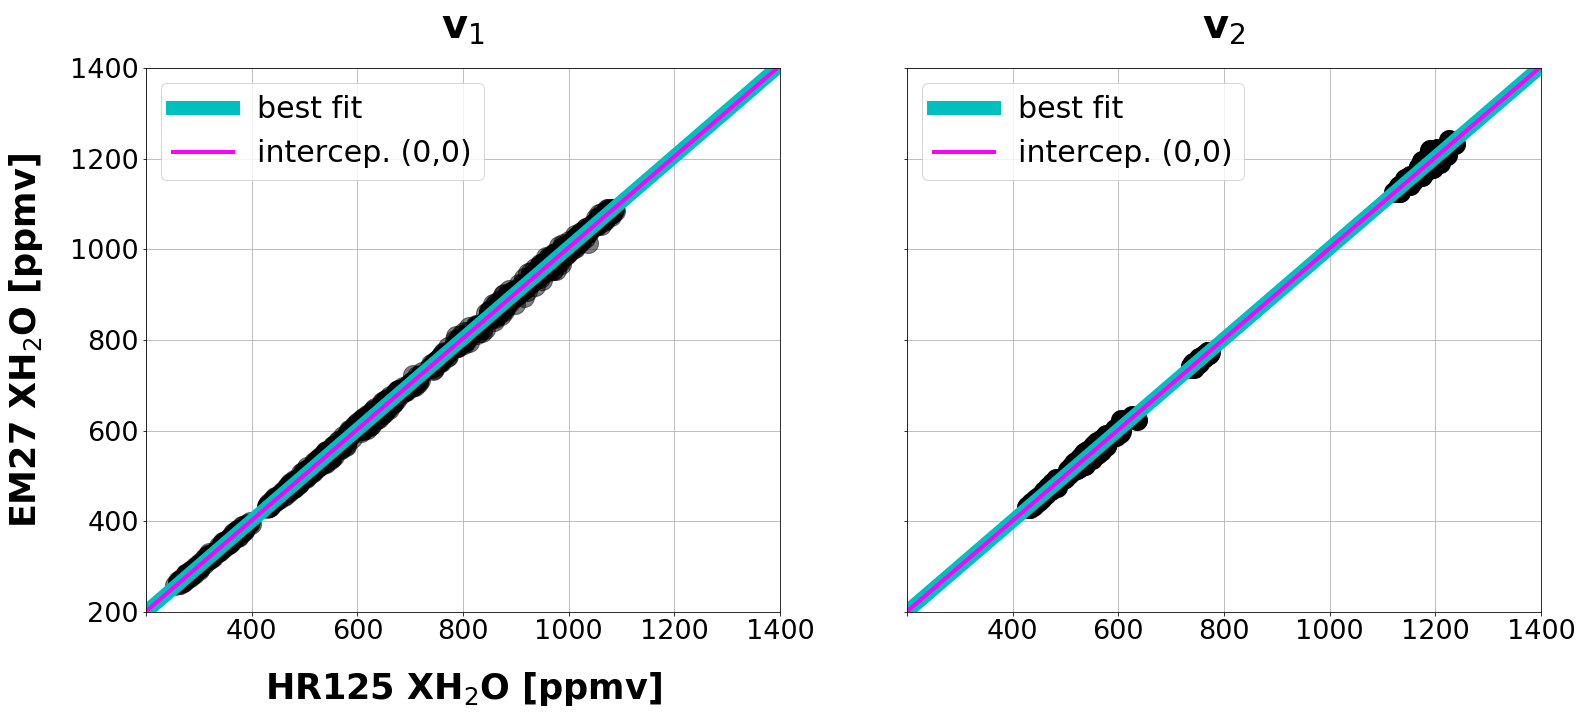

In [56]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25, 'lines.markersize':6,
                    'axes.titlesize':40, 'axes.titleweight':'bold', 'axes.titlepad':30,
                    'xtick.labelsize':27, 'ytick.labelsize':27,
                    'legend.fontsize':30, 'legend.markerscale':4})
plt.subplot(121)
plt.grid()

plt.title('v$_1$')

plt.plot(H2O_hr125_c[0:1628], H2O_em27_c[0:1628], 'ko',  ms=20,alpha=0.5)

plt.plot(np.linspace(200,1400,1000),p_H2O_v1_bf[0]*np.linspace(200,1400,1000) + p_H2O_v1_bf[1], 'c-',\
         linewidth=14, label='best fit' )
plt.plot(np.linspace(200,1400,1000),p_H2O_v1_0[0]*np.linspace(200,1400,1000), color='magenta',linestyle='-', \
         linewidth=4, label='intercep. (0,0)' )

plt.legend(loc='best', markerscale=2)

plt.xlabel('HR125 XH$_2$O [ppmv]')
plt.xticks()
plt.ylabel('EM27 XH$_2$O [ppmv]')
plt.yticks(np.arange(200,1500,200))
plt.ylim(200,1400)
plt.xticks(np.arange(200,1600,200), labels=['','400','600','800','1000','1200','1400'])
plt.xlim(200,1400)


plt.subplot(122)
plt.grid()
plt.title('v$_2$')
plt.plot(H2O_hr125_c[1628:], H2O_em27_c[1628:], 'ko',ms=20)
plt.plot(np.linspace(200,1400,1000),p_H2O_v2_bf[0]*np.linspace(200,1400,1000) + p_H2O_v2_bf[1], 'c-',\
         linewidth=14, label='best fit' )
plt.plot(np.linspace(200,1400,1000),p_H2O_v2_0[0]*np.linspace(200,1400,1000), color='magenta',linestyle='-', \
         linewidth=4, label='intercep. (0,0)' )
plt.legend(loc='best', markerscale=2)
plt.xticks(np.arange(200,1600,200), labels=['','400','600','800','1000','1200','1400'])
plt.xlim(200,1400)
plt.yticks(np.arange(200,1500,200), labels=[])
plt.ylim(200,1400)


plt.show()


(405, 412)

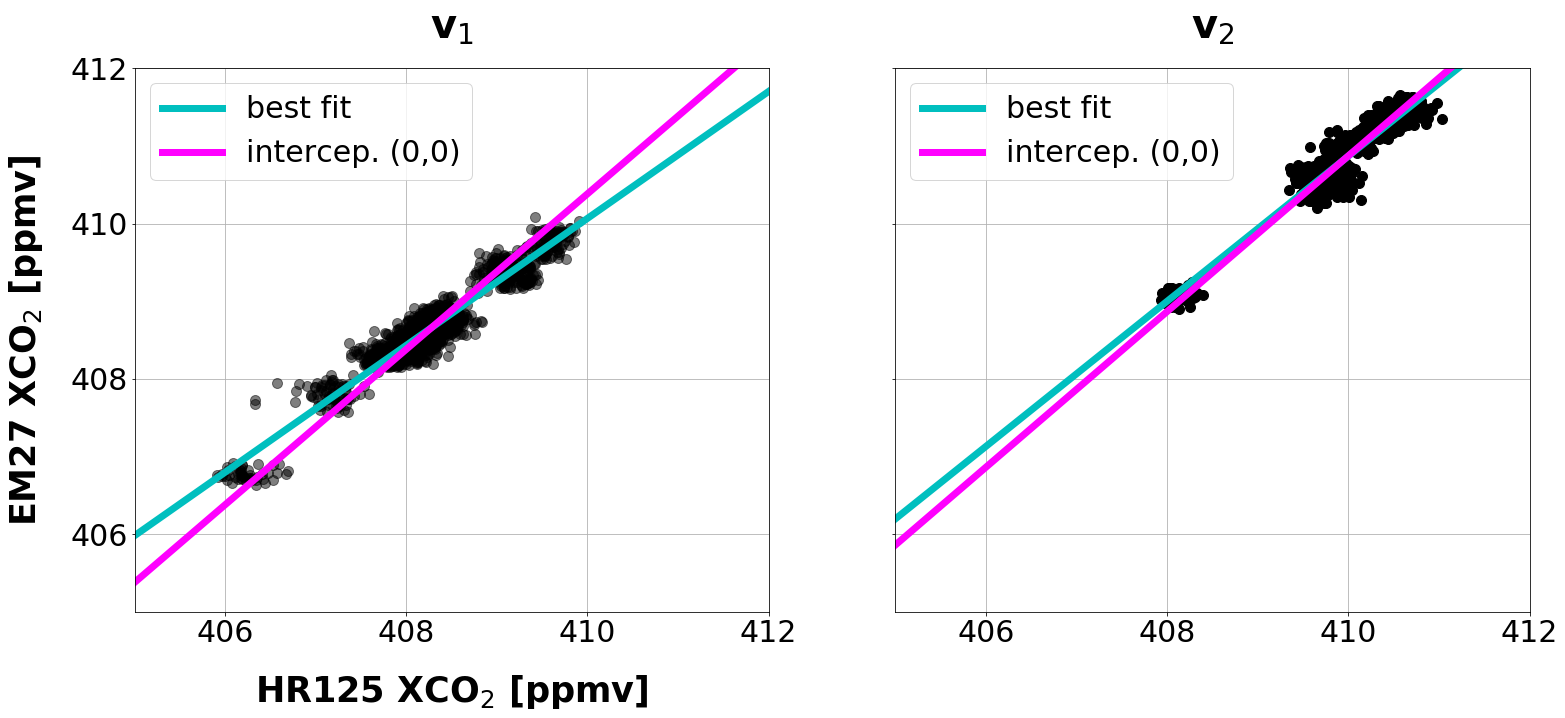

In [57]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25, 'lines.markersize':6,
                    'axes.titlesize':40, 'axes.titleweight':'bold', 'axes.titlepad':30,
                    'xtick.labelsize':30, 'ytick.labelsize':30,
                    'legend.fontsize':30, 'legend.markerscale':4})

plt.subplot(121)
plt.grid()

plt.title('v$_1$')

plt.plot(CO2_hr125_c[0:1628], CO2_em27_c[0:1628], 'ko',  ms=10,alpha=0.5)

plt.plot(np.linspace(405,412,1000),p_CO2_v1_bf[0]*np.linspace(405,412,1000) + p_CO2_v1_bf[1], 'c-',\
         linewidth=7, label='best fit' )
plt.plot(np.linspace(405,412,1000),p_CO2_v1_0[0]*np.linspace(405,412,1000), color='magenta',linestyle='-', \
         linewidth=7, label='intercep. (0,0)' )

plt.legend(loc='best', markerscale=2)

plt.xlabel('HR125 XCO$_2$ [ppmv]')
plt.xticks()
plt.ylabel('EM27 XCO$_2$ [ppmv]')
plt.ylim(405,412)
plt.yticks(np.arange(406,413,2))
plt.xticks(np.arange(406,413,2))
plt.xlim(405,412)


plt.subplot(122)
plt.grid()
plt.title('v$_2$')
plt.plot(CO2_hr125_c[1628:], CO2_em27_c[1628:], 'ko',ms=10)

plt.plot(np.linspace(405,412,1000),p_CO2_v2_bf[0]*np.linspace(405,412,1000) + p_CO2_v2_bf[1], 'c-',\
         linewidth=7, label='best fit' )
plt.plot(np.linspace(405,412,1000),p_CO2_v2_0[0]*np.linspace(405,412,1000), color='magenta',linestyle='-', \
         linewidth=7, label='intercep. (0,0)' )

plt.legend(loc='best', markerscale=2)
plt.ylim(405,412)
plt.yticks(np.arange(406,413,2),labels=[])
plt.xticks(np.arange(406,413,2))
plt.xlim(405,412)

([<matplotlib.axis.XTick at 0x1fcffbf9f88>,
 <a list of 4 Text xticklabel objects>)

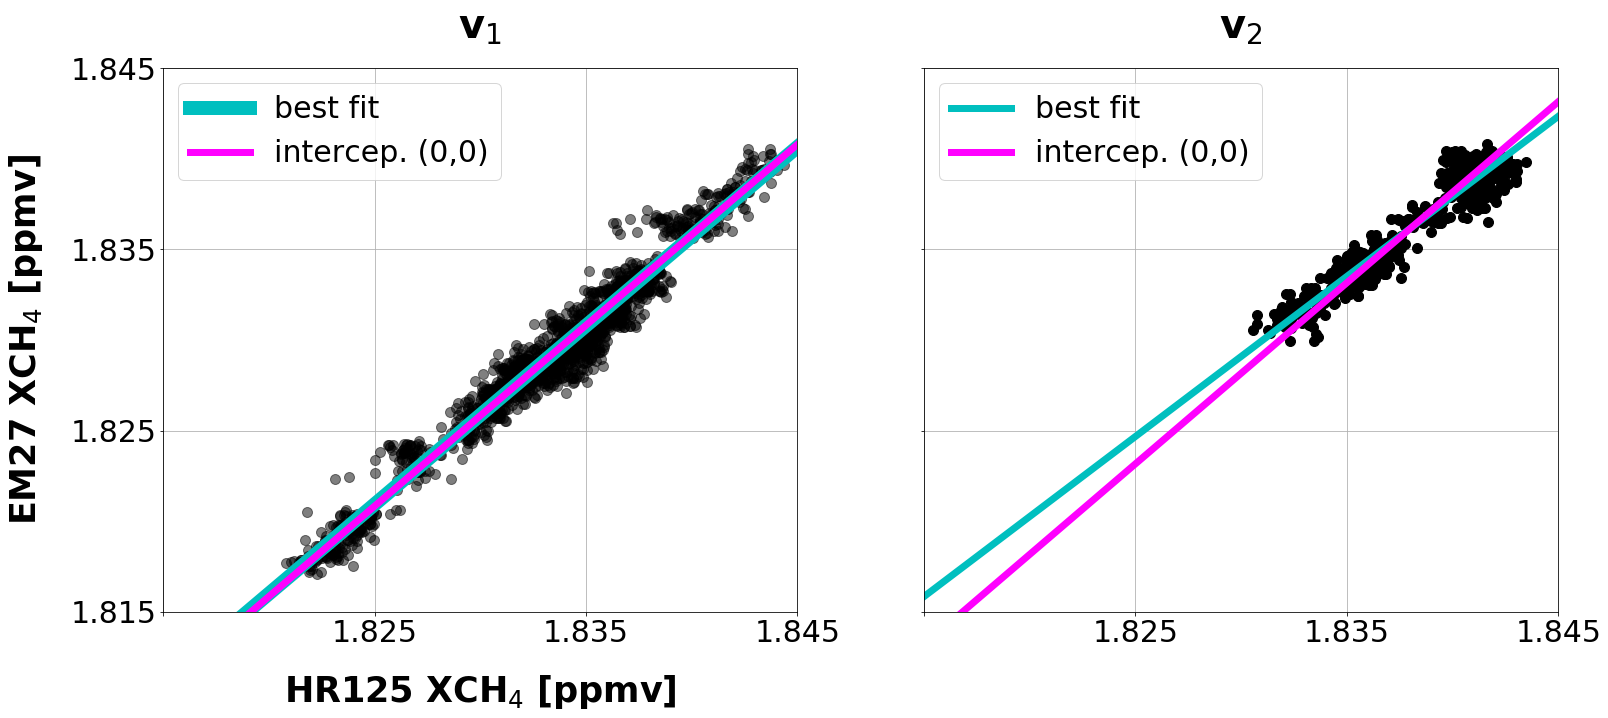

In [58]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25, 'lines.markersize':6,
                    'axes.titlesize':40, 'axes.titleweight':'bold', 'axes.titlepad':30,
                    'xtick.labelsize':30, 'ytick.labelsize':30,
                    'legend.fontsize':30, 'legend.markerscale':4})

plt.subplot(121)
plt.grid()

plt.title('v$_1$')

plt.plot(CH4_hr125_c[0:1628], CH4_em27_c[0:1628], 'ko',  ms=10,alpha=0.5)

plt.plot(np.linspace(1.815,1.845,1000),p_CH4_v1_bf[0]*np.linspace(1.815,1.845,1000) + p_CH4_v1_bf[1], 'c-',\
         linewidth=14, label='best fit' )
plt.plot(np.linspace(1.815,1.845,1000),p_CH4_v1_0[0]*np.linspace(1.815,1.845,1000), color='magenta',linestyle='-', \
         linewidth=7, label='intercep. (0,0)' )

plt.legend(loc='best', markerscale=2)

plt.xlabel('HR125 XCH$_4$ [ppmv]')
plt.xticks()
plt.ylabel('EM27 XCH$_4$ [ppmv]')
plt.ylim(1.815,1.845)
plt.xlim(1.815,1.845)
plt.yticks(np.arange(1.815,1.845,0.01))
plt.xticks(np.arange(1.815,1.845,0.01), labels=['','1.825','1.835','1.845'])


plt.subplot(122)
plt.grid()
plt.title('v$_2$')
plt.plot(CH4_hr125_c[1628:], CH4_em27_c[1628:], 'ko',ms=10)

plt.plot(np.linspace(1.815,1.845,1000),p_CH4_v2_bf[0]*np.linspace(1.815,1.845,1000) + p_CH4_v2_bf[1], 'c-',\
         linewidth=7, label='best fit' )
plt.plot(np.linspace(1.815,1.845,1000),p_CH4_v2_0[0]*np.linspace(1.815,1.845,1000), color='magenta',linestyle='-', \
         linewidth=7, label='intercep. (0,0)' )

plt.legend(loc='best', markerscale=2)
plt.ylim(1.815,1.845)
plt.xlim(1.815,1.845)
plt.yticks(np.arange(1.815,1.845,0.01), labels=[])
plt.xticks(np.arange(1.815,1.845,0.01), labels=['','1.825','1.835','1.845'])



In [59]:
pear_H2O_v1 = stats.pearsonr(H2O_hr125_c_v1,H2O_em27_c_v1)
pear_H2O_v2 = stats.pearsonr(H2O_hr125_c_v2,H2O_em27_c_v2)

pear_CO2_v1 = stats.pearsonr(CO2_hr125_c_v1,CO2_em27_c_v1)
pear_CO2_v2 = stats.pearsonr(CO2_hr125_c_v2,CO2_em27_c_v2)

pear_CH4_v1 = stats.pearsonr(CH4_hr125_c_v1,CH4_em27_c_v1)
pear_CH4_v2 = stats.pearsonr(CH4_hr125_c_v2, CH4_em27_c_v2)


pear_H2O_v1_0 = np.sqrt(1 - res_H2O_v1 / (H2O_em27_c_v1.size * H2O_em27_c_v1.var()))
pear_H2O_v2_0 = np.sqrt(1 - res_H2O_v2 / (H2O_em27_c_v2.size * H2O_em27_c_v2.var()))

pear_CO2_v1_0 = np.sqrt(1 - res_CO2_v1 / (CO2_em27_c_v1.size * CO2_em27_c_v1.var()))
pear_CO2_v2_0 = np.sqrt(1 - res_CO2_v2 / (CO2_em27_c_v2.size * CO2_em27_c_v2.var()))

pear_CH4_v1_0 = np.sqrt(1 - res_CH4_v1 / (CH4_em27_c_v1.size * CH4_em27_c_v1.var()))
pear_CH4_v2_0 = np.sqrt(1 - res_CH4_v2 / (CH4_em27_c_v2.size * CH4_em27_c_v2.var()))



In [60]:
print(A_H2O_v1)

[[768.89300537]
 [760.89398193]
 [755.184021  ]
 ...
 [959.184021  ]
 [956.375     ]
 [944.934021  ]]


In [61]:
print(pear_H2O_v1,pear_H2O_v2)
print(pear_CO2_v1,pear_CO2_v2)
print(pear_CH4_v1,pear_CH4_v2)

(0.9996539159869053, 0.0) (0.9997998215018461, 0.0)
(0.96091116835328, 0.0) (0.9700779410531595, 0.0)
(0.9792732669842916, 0.0) (0.9554043320043921, 0.0)


In [62]:
print(pear_H2O_v1_0, pear_H2O_v2_0)
print(pear_CO2_v1_0, pear_CO2_v2_0)
print(pear_CH4_v1_0, pear_CH4_v2_0)

[0.99965235] [0.99979964]
[0.93632671] [0.96750879]
[0.97920368] [0.94715486]


# MEDIAS Y SIGMA DE MAG. DE COMP.

In [63]:
sf_H2O_c_v1 = H2O_em27_c_v1 / H2O_hr125_c_v1
sf_H2O_c_v2 = H2O_em27_c_v2 / H2O_hr125_c_v2

sf_CO2_c_v1 = CO2_em27_c_v1 / CO2_hr125_c_v1
sf_CO2_c_v2 = CO2_em27_c_v2 / CO2_hr125_c_v2

sf_CH4_c_v1 = CH4_em27_c_v1 / CH4_hr125_c_v1
sf_CH4_c_v2 = CH4_em27_c_v2 / CH4_hr125_c_v2

diff_H2O_c_v1 = H2O_em27_c_v1 - H2O_hr125_c_v1
diff_H2O_c_v2 = H2O_em27_c_v2 - H2O_hr125_c_v2

diff_CO2_c_v1 = CO2_em27_c_v1 - CO2_hr125_c_v1
diff_CO2_c_v2 = CO2_em27_c_v2 - CO2_hr125_c_v2

diff_CH4_c_v1 = CH4_em27_c_v1 - CH4_hr125_c_v1
diff_CH4_c_v2 = CH4_em27_c_v2 - CH4_hr125_c_v2


diff_perc_H2O_c_v1 = 100*(H2O_em27_c_v1 - H2O_hr125_c_v1) / H2O_hr125_c_v1
diff_perc_H2O_c_v2 = 100*(H2O_em27_c_v2 - H2O_hr125_c_v2) / H2O_hr125_c_v2

diff_perc_CO2_c_v1 = 100*(CO2_em27_c_v1 - CO2_hr125_c_v1) / CO2_hr125_c_v1
diff_perc_CO2_c_v2 = 100*(CO2_em27_c_v2 - CO2_hr125_c_v2) / CO2_hr125_c_v2

diff_perc_CH4_c_v1 = 100*(CH4_em27_c_v1 - CH4_hr125_c_v1) / CH4_hr125_c_v1
diff_perc_CH4_c_v2 = 100*(CH4_em27_c_v2 - CH4_hr125_c_v2) / CH4_hr125_c_v2



In [64]:
def m_and_std():
    for mag in [[sf_H2O_c_v1,'sf_H2O_c_v1'], [sf_H2O_c_v2,'sf_H2O_c_v2'], 
                [sf_CO2_c_v1,'sf_CO2_c_v1'],  [sf_CO2_c_v2, 'sf_CO2_c_v2'],
                [sf_CH4_c_v1, 'sf_CH4_c_v1'],[sf_CH4_c_v2, 'sf_CH4_c_v2'],\
                [diff_H2O_c_v1, 'diff_H2O_c_v1'],[diff_H2O_c_v2, 'diff_H2O_c_v2'],\
                [diff_CO2_c_v1, 'diff_CO2_c_v1'],[diff_CO2_c_v2, 'diff_CO2_c_v2'],\
                [diff_CH4_c_v1, 'diff_CH4_c_v1'],[diff_CH4_c_v2, 'diff_CH4_c_v2'],\
                [diff_perc_H2O_c_v1, 'diff_perc_H2O_c_v1'],[diff_perc_H2O_c_v2, 'diff_perc_H2O_c_v2'],\
                [diff_perc_CO2_c_v1, 'diff_perc_CO2_c_v1'],[diff_perc_CO2_c_v2, 'diff_perc_CO2_c_v2'],
                [diff_perc_CH4_c_v1,'diff_perc_CH4_c_v1'],[diff_perc_CH4_c_v2,'diff_perc_CH4_c_v2']]:
        
        print('m ' + mag[1] + ': {}'.format(np.mean(mag[0])))
        print('std '+ mag[1] + ': {}'.format(np.std(mag[0])))

In [65]:
m_and_std()

m sf_H2O_c_v1: 1.0035548210144043
std sf_H2O_c_v1: 0.010054107755422592
m sf_H2O_c_v2: 1.0022586584091187
std sf_H2O_c_v2: 0.008703012950718403
m sf_CO2_c_v1: 1.00093412399292
std sf_CO2_c_v1: 0.000504757568705827
m sf_CO2_c_v2: 1.002126932144165
std sf_CO2_c_v2: 0.0004431853594724089
m sf_CH4_c_v1: 0.9977157711982727
std sf_CH4_c_v1: 0.0005423944676294923
m sf_CH4_c_v2: 0.9989959597587585
std sf_CH4_c_v2: 0.0004937306512147188
m diff_H2O_c_v1: 2.623143196105957
std diff_H2O_c_v1: 6.672296047210693
m diff_H2O_c_v2: 1.7766109704971313
std diff_H2O_c_v2: 5.995029449462891
m diff_CO2_c_v1: 0.38117948174476624
std diff_CO2_c_v1: 0.20563633739948273
m diff_CO2_c_v2: 0.8718367218971252
std diff_CO2_c_v2: 0.18124721944332123
m diff_CH4_c_v1: -0.0041876910254359245
std diff_CH4_c_v1: 0.0009952764958143234
m diff_CH4_c_v2: -0.0018459808779880404
std diff_CH4_c_v2: 0.0009089508675970137
m diff_perc_H2O_c_v1: 0.35548004508018494
std diff_perc_H2O_c_v1: 1.0054107904434204
m diff_perc_H2O_c_v2: 0.2

(array([  0., 100., 200., 300.]), <a list of 4 Text yticklabel objects>)

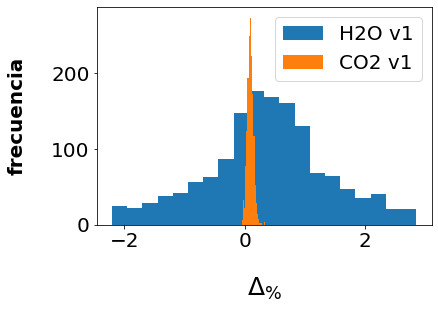

In [66]:
plt.hist(diff_perc_H2O_c_v1, bins=20, label='H2O v1')
plt.hist(diff_perc_CO2_c_v1, bins=20, label= 'CO2 v1')
plt.xlabel('$\Delta_{\%}$', fontsize=25)
plt.ylabel('frecuencia', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# DEPENDENCIA CON LAS CONCENTRACIONES

C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
C:\Users\Yazmina\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
C:\Users\Yazmina\Anacon

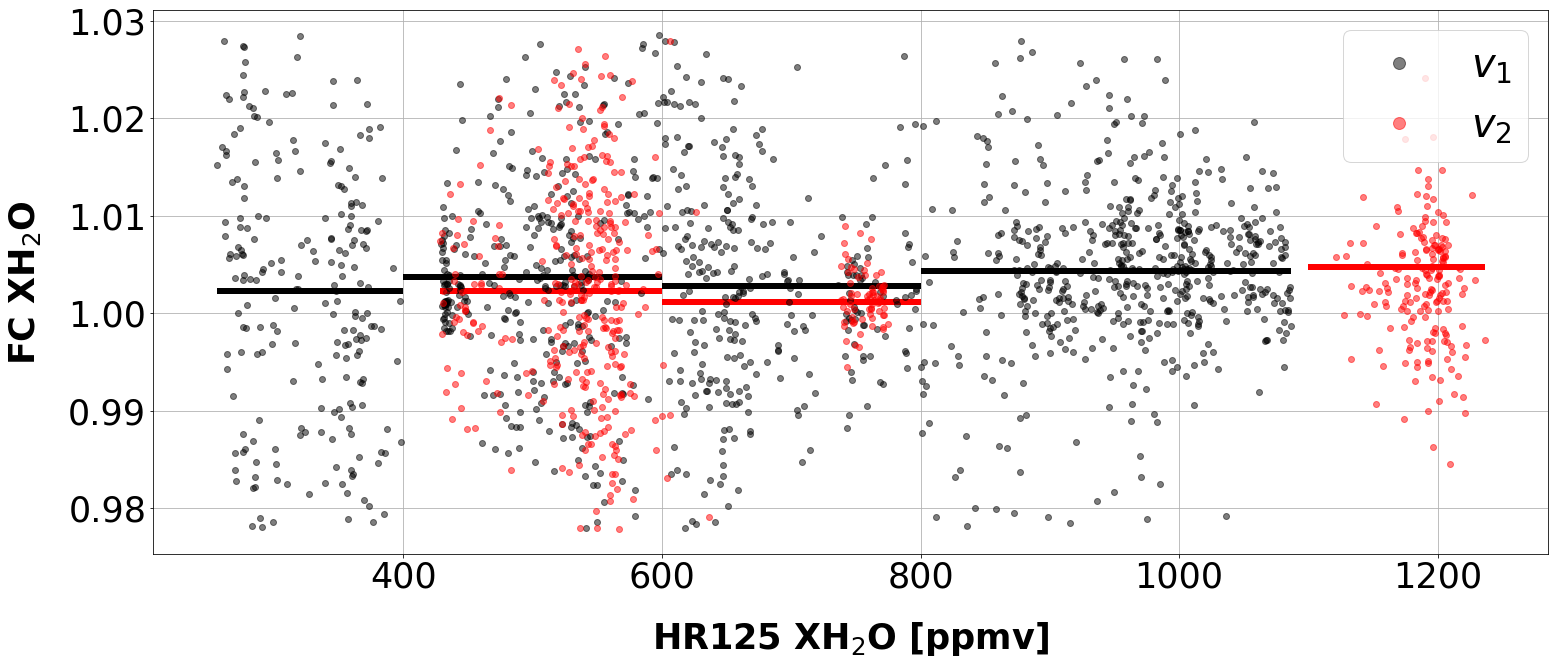

In [67]:
%matplotlib inline
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':40})


plt.grid()
plt.plot(H2O_hr125_c[0:1628], scale_factor_c[0:1628,0], 'ko', label='$v_1$', alpha=0.5)
plt.plot(H2O_hr125_c[1628:], scale_factor_c[1628:,0], 'ro', label='$v_2$', alpha=0.5)
plt.xlabel('HR125 XH$_2$O [ppmv]')
plt.xticks()
plt.ylabel('FC XH$_2$O')
plt.yticks()
plt.legend(loc='best', markerscale=2)

plt.hlines(np.mean(scale_factor_c[0:1628,0][H2O_hr125_c[0:1628]<400]),\
           xmin = np.nanmin(H2O_hr125_c[0:1628]),xmax = 400, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,0][(H2O_hr125_c[0:1628]<600) & (H2O_hr125_c[0:1628] >400)]),\
           xmin =400,xmax = 600, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,0][(H2O_hr125_c[0:1628]<800) & (H2O_hr125_c[0:1628] >600)]),\
           xmin =600,xmax = 800, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,0][H2O_hr125_c[0:1628] >800]),\
           xmin =800,xmax = np.nanmax(H2O_hr125_c[0:1628]), linewidth=6)

plt.hlines(np.mean(scale_factor_c[1628:,0][H2O_hr125_c[1628:]<600]),\
           xmin =np.nanmin(H2O_hr125_c[1628:]),xmax = 600, linewidth=6, colors='r')
plt.hlines(np.mean(scale_factor_c[1628:,0][(H2O_hr125_c[1628:]<800) & (H2O_hr125_c[1628:] >600)]),\
           xmin =600,xmax = 800, linewidth=6,colors='r')
plt.hlines(np.mean(scale_factor_c[0:1628,0][H2O_hr125_c[0:1628] >1000]),\
           xmin =1100,xmax = np.nanmax(H2O_hr125_c[1628:]), linewidth=6, colors='r')
plt.show()


In [68]:
import warnings
warnings.filterwarnings('ignore')

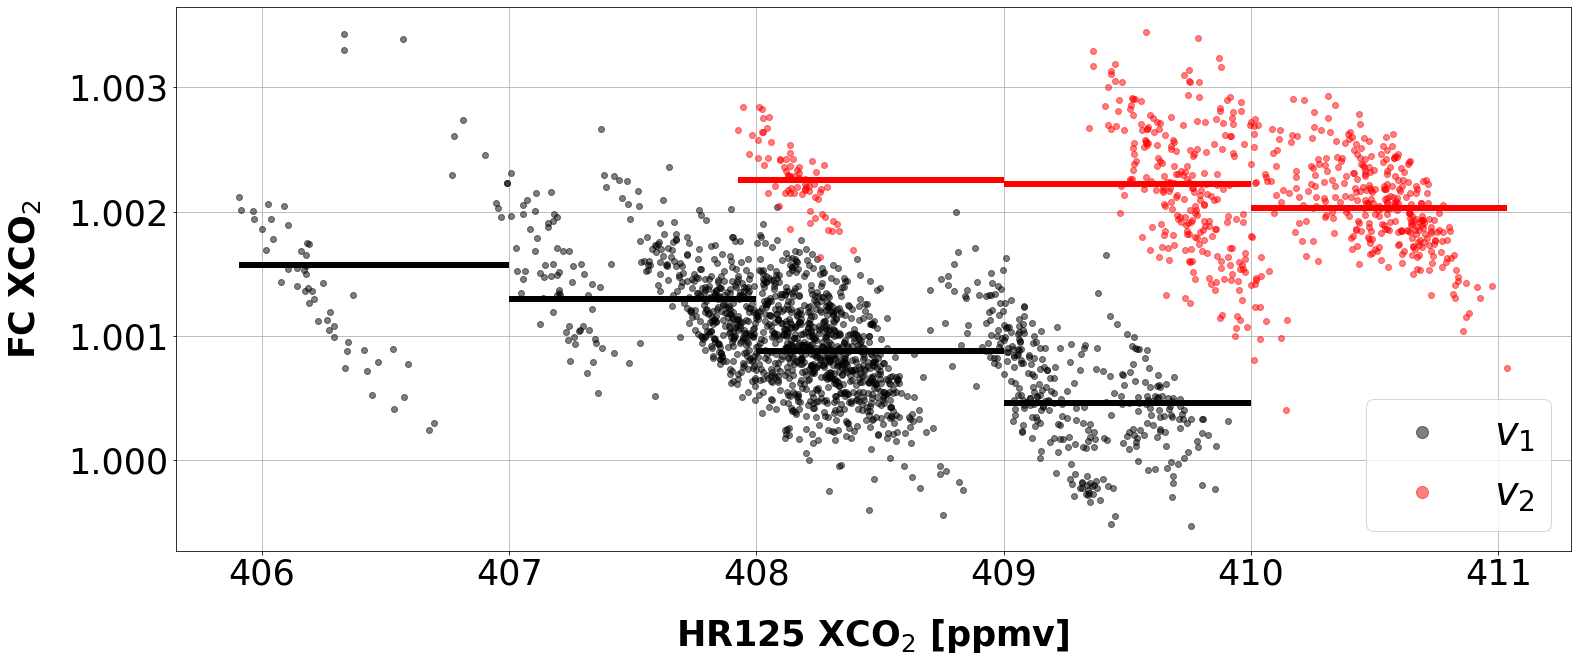

In [69]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35, ''
                    'legend.fontsize':40})

#plt.subplot(311)
plt.grid()
plt.plot(CO2_hr125_c[0:1628], scale_factor_c[0:1628,1], 'ko', label='$v_1$', alpha=0.5)
plt.plot(CO2_hr125_c[1628:], scale_factor_c[1628:,1], 'ro', label='$v_2$', alpha=0.5)
plt.xlabel('HR125 XCO$_2$ [ppmv]')
plt.xticks()
plt.ylabel('FC XCO$_2$')
plt.yticks()
plt.legend(loc='best', markerscale=2)

plt.hlines(np.mean(scale_factor_c[0:1628,1][(CO2_hr125_c[0:1628]<407) & (CO2_hr125_c[0:1628] >405)]),\
           xmin = np.nanmin(CO2_hr125_c[0:1628]),xmax = 407, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,1][(CO2_hr125_c[0:1628]<408) & (CO2_hr125_c[0:1628] >407)]),\
           xmin =407,xmax = 408, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,1][(CO2_hr125_c[0:1628]<409) & (CO2_hr125_c[0:1628] >408)]),\
           xmin =408,xmax = 409, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,1][(CO2_hr125_c[0:1628]<410) & (CO2_hr125_c[0:1628] >409)]),\
           xmin =409,xmax = 410, linewidth=6)

plt.hlines(np.mean(scale_factor_c[1628:,1][(CO2_hr125_c[1628:]<409) & (CO2_hr125_c[1628:] >408)]), xmin = np.nanmin(CO2_hr125_c[1628:]),xmax = 409, linewidth=6,colors='r')
plt.hlines(np.mean(scale_factor_c[1628:,1][(CO2_hr125_c[1628:]<410) & (CO2_hr125_c[1628:] >409)]),\
           xmin =409,xmax = 410, linewidth=6,colors='r')
plt.hlines(np.mean(scale_factor_c[1628:,1][(CO2_hr125_c[1628:]<411) & (CO2_hr125_c[1628:] >410)]),\
           xmin =410,xmax = np.nanmax(CO2_hr125_c[1628:]), linewidth=6, colors='r')

plt.show()


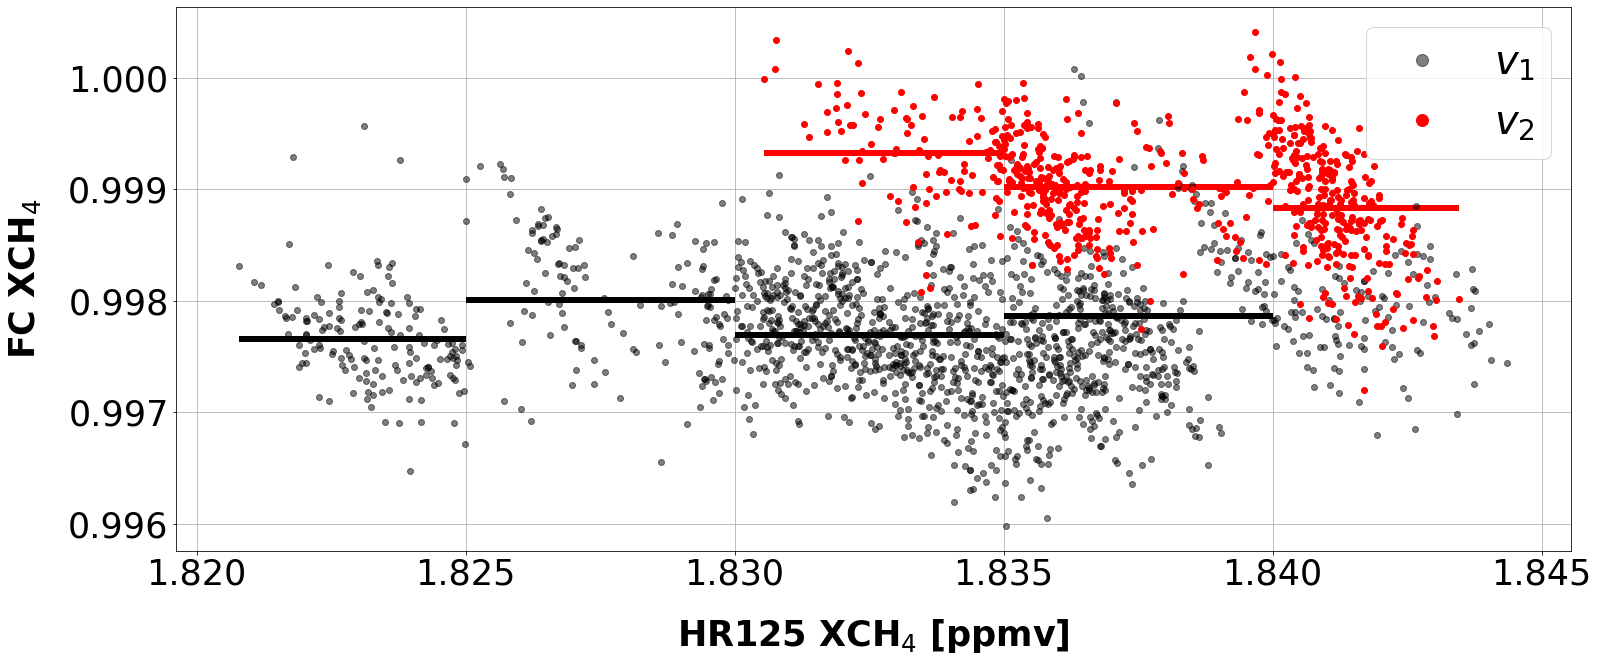

In [64]:
fig = plt.figure(figsize=(25,10))
plt.rcParams.update({'axes.labelsize':35, 'axes.labelweight':'bold', 'axes.labelpad':25,
                    'xtick.labelsize':35, 'ytick.labelsize':35,
                    'legend.fontsize':40})

#plt.subplot(311)
plt.grid()
plt.plot(CH4_hr125_c[0:1628], scale_factor_c[0:1628,2], 'ko', label='$v_1$', alpha=0.5)
plt.plot(CH4_hr125_c[1628:], scale_factor_c[1628:,2], 'ro', label='$v_2$')
plt.xlabel('HR125 XCH$_4$ [ppmv]')
plt.xticks()
plt.ylabel('FC XCH$_4$')
plt.yticks()
plt.legend(loc='best', markerscale=2)

plt.hlines(np.mean(scale_factor_c[0:1628,2][CH4_hr125_c[0:1628]<1.825]),\
           xmin = np.nanmin(CH4_hr125_c[0:1628]),xmax = 1.825, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,2][(CH4_hr125_c[0:1628]<1.830) & (CH4_hr125_c[0:1628] >1.825)]),\
           xmin =1.825,xmax = 1.830, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,2][(CH4_hr125_c[0:1628]<1.835) & (CH4_hr125_c[0:1628] >1.830)]),\
           xmin =1.830,xmax = 1.835, linewidth=6)
plt.hlines(np.mean(scale_factor_c[0:1628,2][CH4_hr125_c[0:1628] >1.840]),\
           xmin =1.835,xmax = 1.840, linewidth=6)

plt.hlines(np.mean(scale_factor_c[1628:,2][CH4_hr125_c[1628:]<1.835]), \
           xmin = np.nanmin(CH4_hr125_c[1628:]),xmax = 1.835, linewidth=6,colors='r')
plt.hlines(np.mean(scale_factor_c[1628:,2][(CH4_hr125_c[1628:]<1.840) & (CH4_hr125_c[1628:] >1.835)]),\
           xmin =1.835,xmax = 1.840, linewidth=6,colors='r')
plt.hlines(np.mean(scale_factor_c[1628:,2][CH4_hr125_c[1628:] >1.840]),\
           xmin =1.840,xmax = np.nanmax(CH4_hr125_c[1628:]), linewidth=6, colors='r')